In [1]:
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
%matplotlib inline
!pwd

/home/ikea/GraphLearn/example


In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice


def get_graphs(dataset_fname='bursi.pos.gspan', size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

        

DEMONSTRATING GRAPH MANAGER


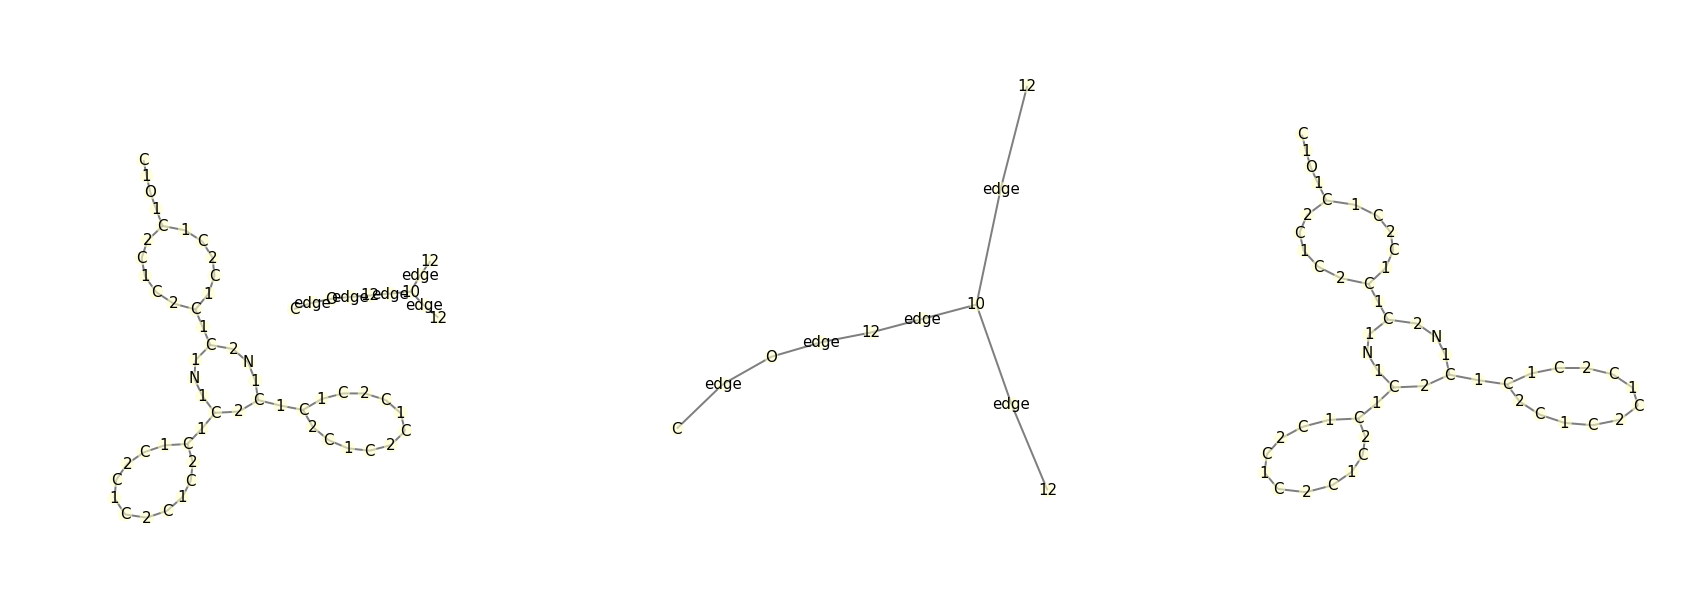

DEMONSTRATING EXTRACTION


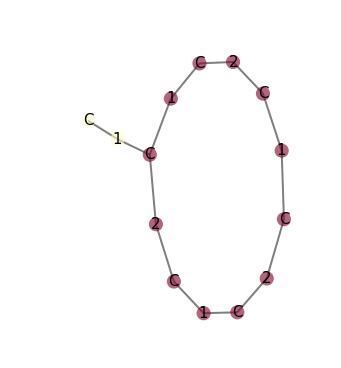

In [3]:
'''TESTING EXTRACTION AND GRAPHMANAGER'''
from graphlearn.utils import draw
import graphlearn.abstract_graphs.molecules as mole
from eden.graph import Vectorizer
import graphlearn.abstract_graphs.ubergraphlearn as ugly
vectorizer=Vectorizer()

print 'DEMONSTRATING GRAPH MANAGER'
graphs=get_graphs()
g=graphs.next()
gm=mole.GraphManager(g,vectorizer)
draw.graphlearn_draw([gm.get_estimateable(),gm.get_abstract_graph(),gm.get_base_graph()], size = 10,vertex_label = 'label',contract=False)

print 'DEMONSTRATING EXTRACTION'  
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[2]
argz=(gm,radius_list,thickness_list,Vectorizer(),2**20-1,lambda x,y:True, base_thickness_list)
cips=ugly.extract_cores_and_interfaces_mk2(argz)
draw.graphlearn_draw(cips[0][0].graph, contract=False)

In [4]:
%%time
'''
learning a grammar
'''
import graphlearn.abstract_graphs.molecules as mole
graphs = get_graphs()

sampler=mole.MoleculeSampler(radius_list=[0,1],thickness_list=[1],base_thickness_list=[1], min_cip_count=1, min_interface_count=2, postprocessor=mole.PostProcessor())
def graph_prepare(graphs,sampler):
    for g in graphs:
        yield mole.GraphManager(g,sampler.vectorizer)
        
graphs=graph_prepare(graphs,sampler)    
sampler.fit(graphs,n_jobs=1,batch_size=1)
sampler.save('tmp/mole_ubergrammar.ge')


Classifier:
SGDClassifier(alpha=0.000288704460406, average=False, class_weight=None,
       epsilon=0.1, eta0=0.377282800975, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=46, n_jobs=1,
       penalty='l1', power_t=0.583689262638, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 100  #interfaces: 116   #cores: 295   #core-interface-pairs: 596
Saved model: tmp/mole_ubergrammar.ge
CPU times: user 23.9 s, sys: 2.69 s, total: 26.6 s
Wall time: 23.6 s


interface id: 508423 [37 options]


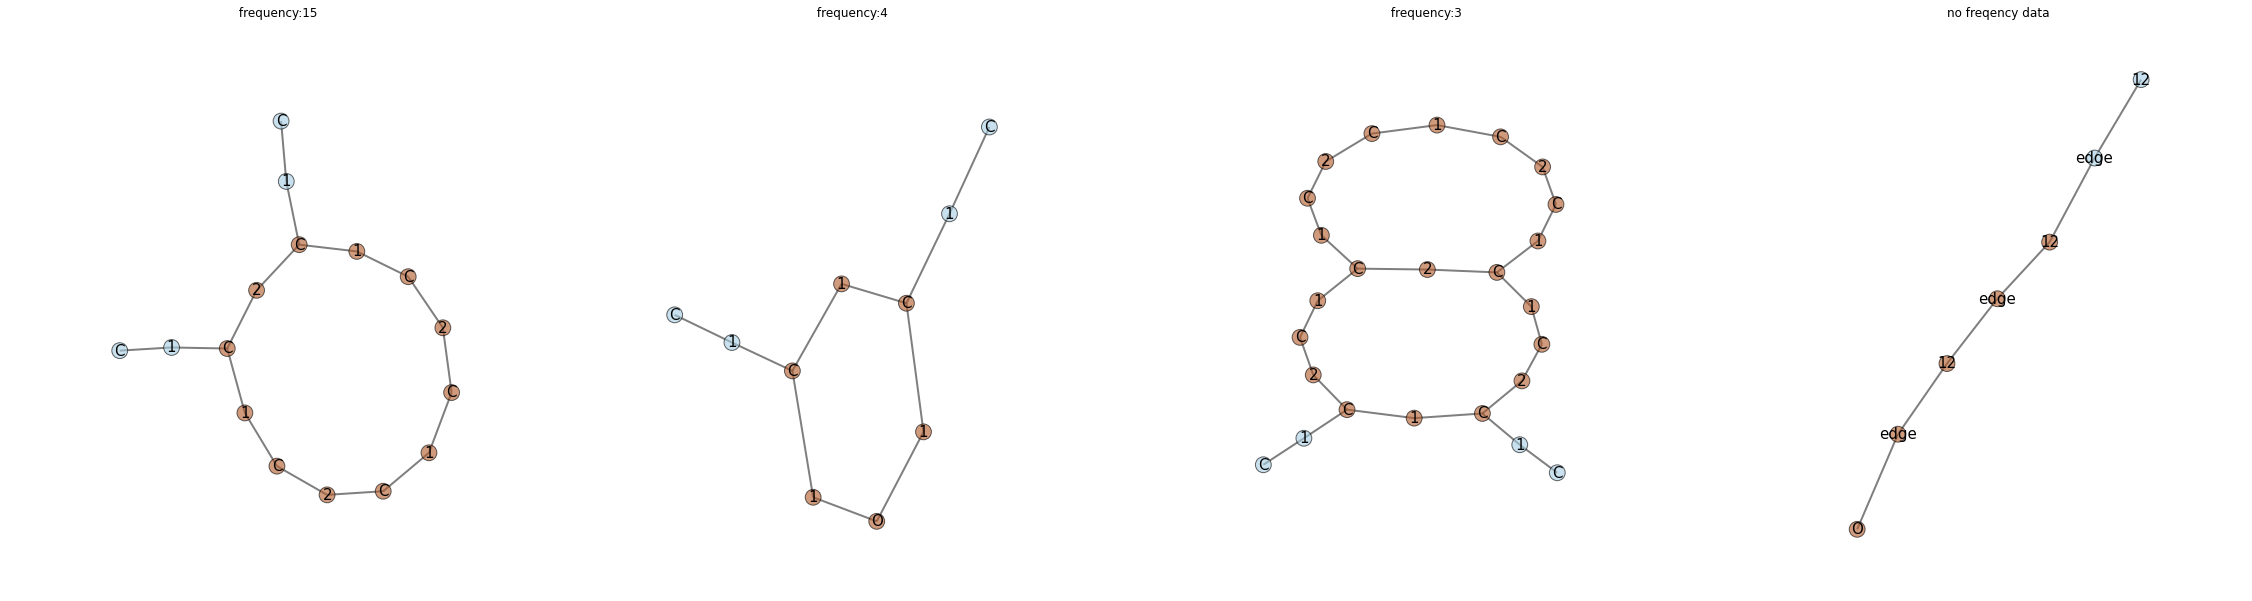

interface id: 760492 [36 options]


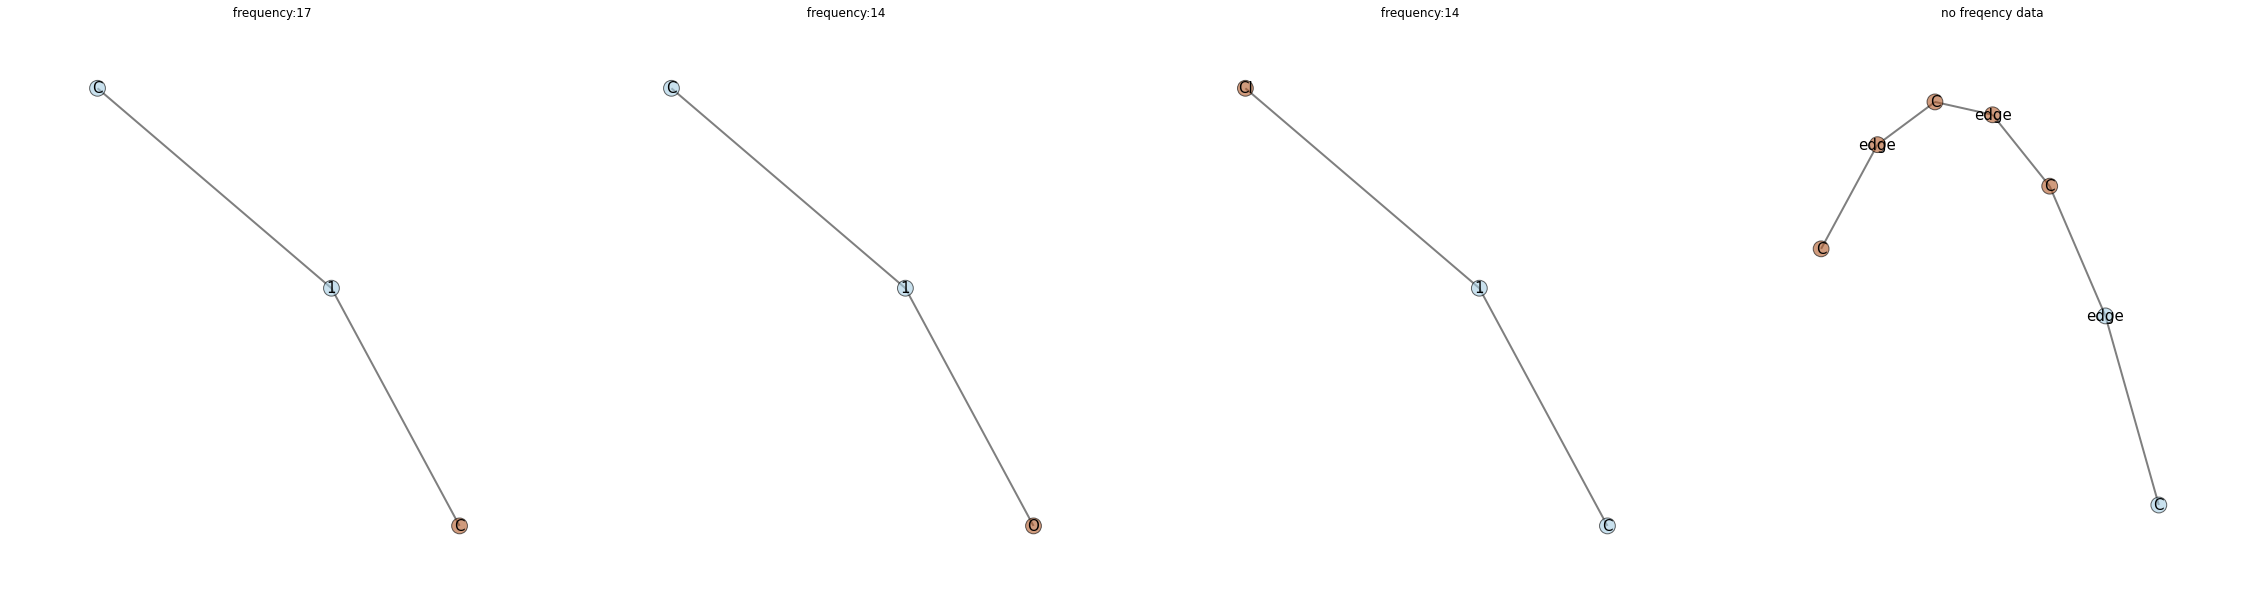

interface id: 16741 [30 options]


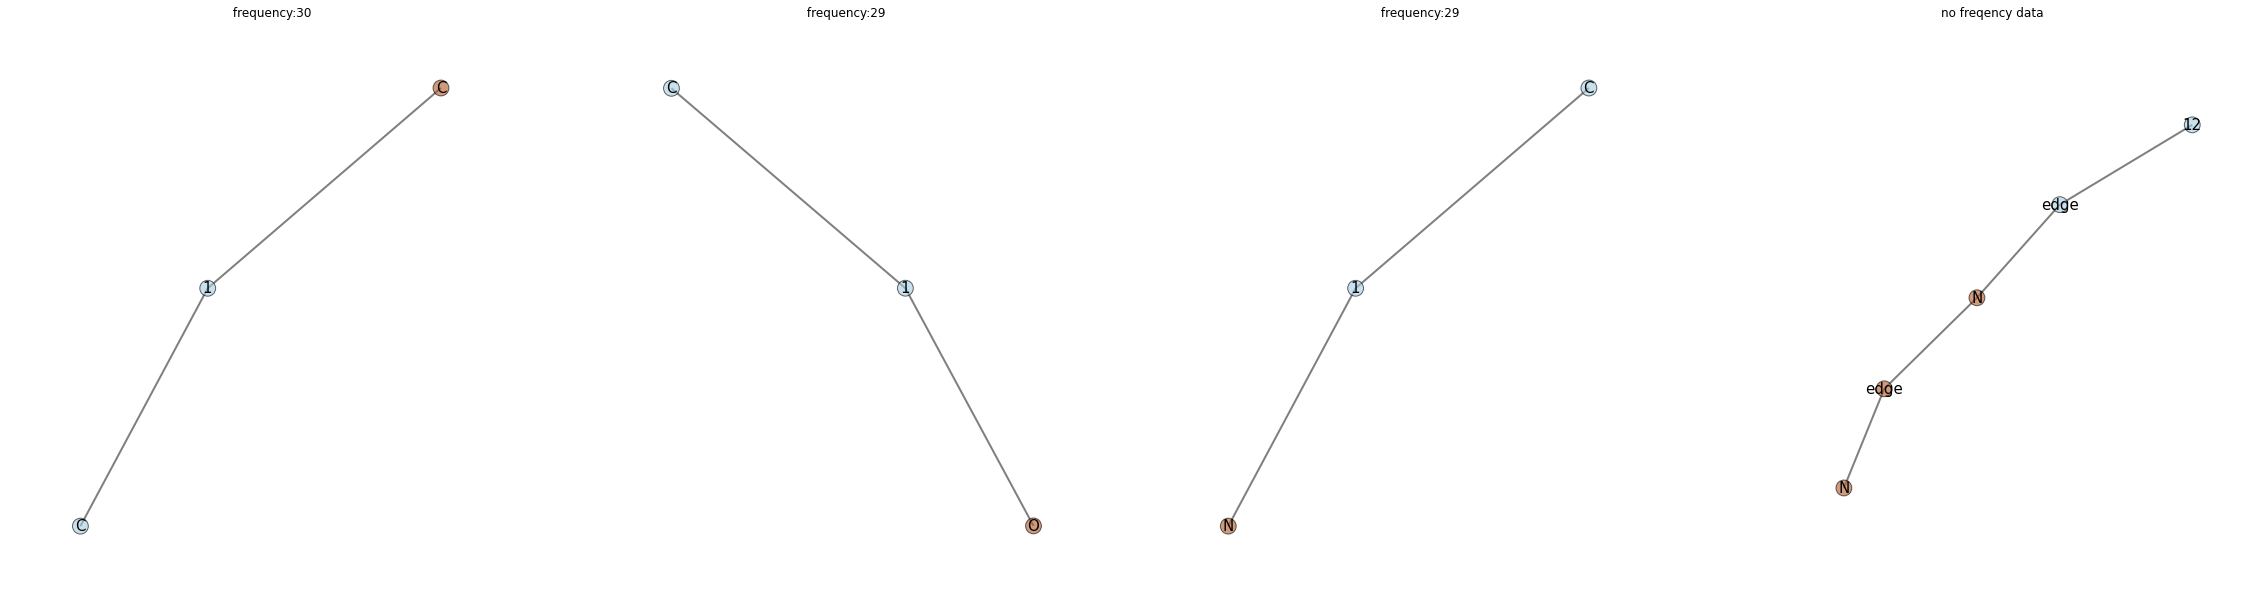

interface id: 958702 [28 options]


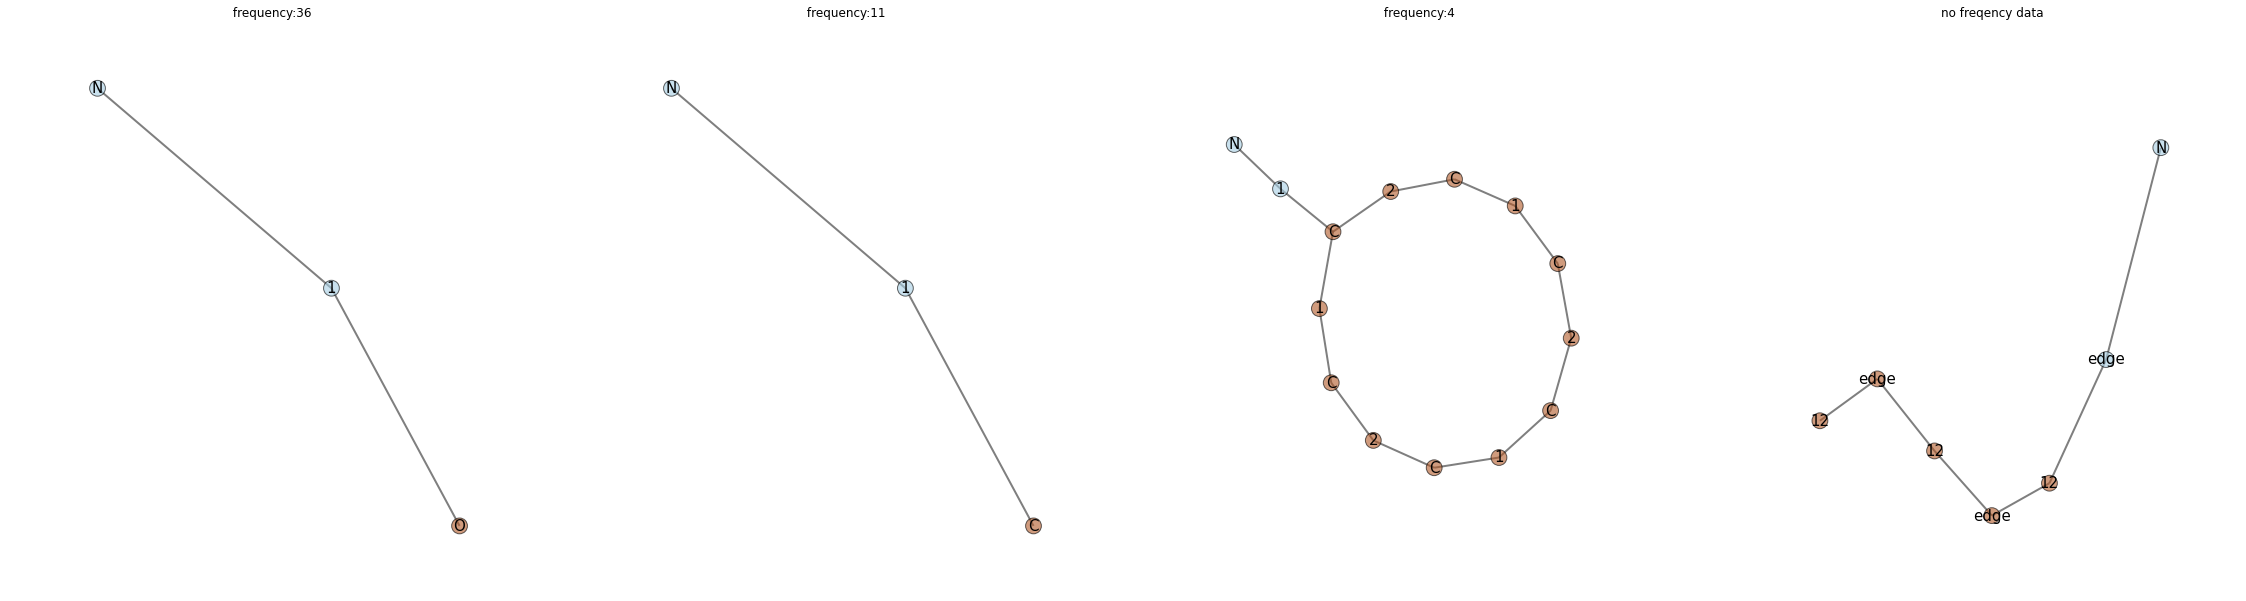

interface id: 424403 [20 options]


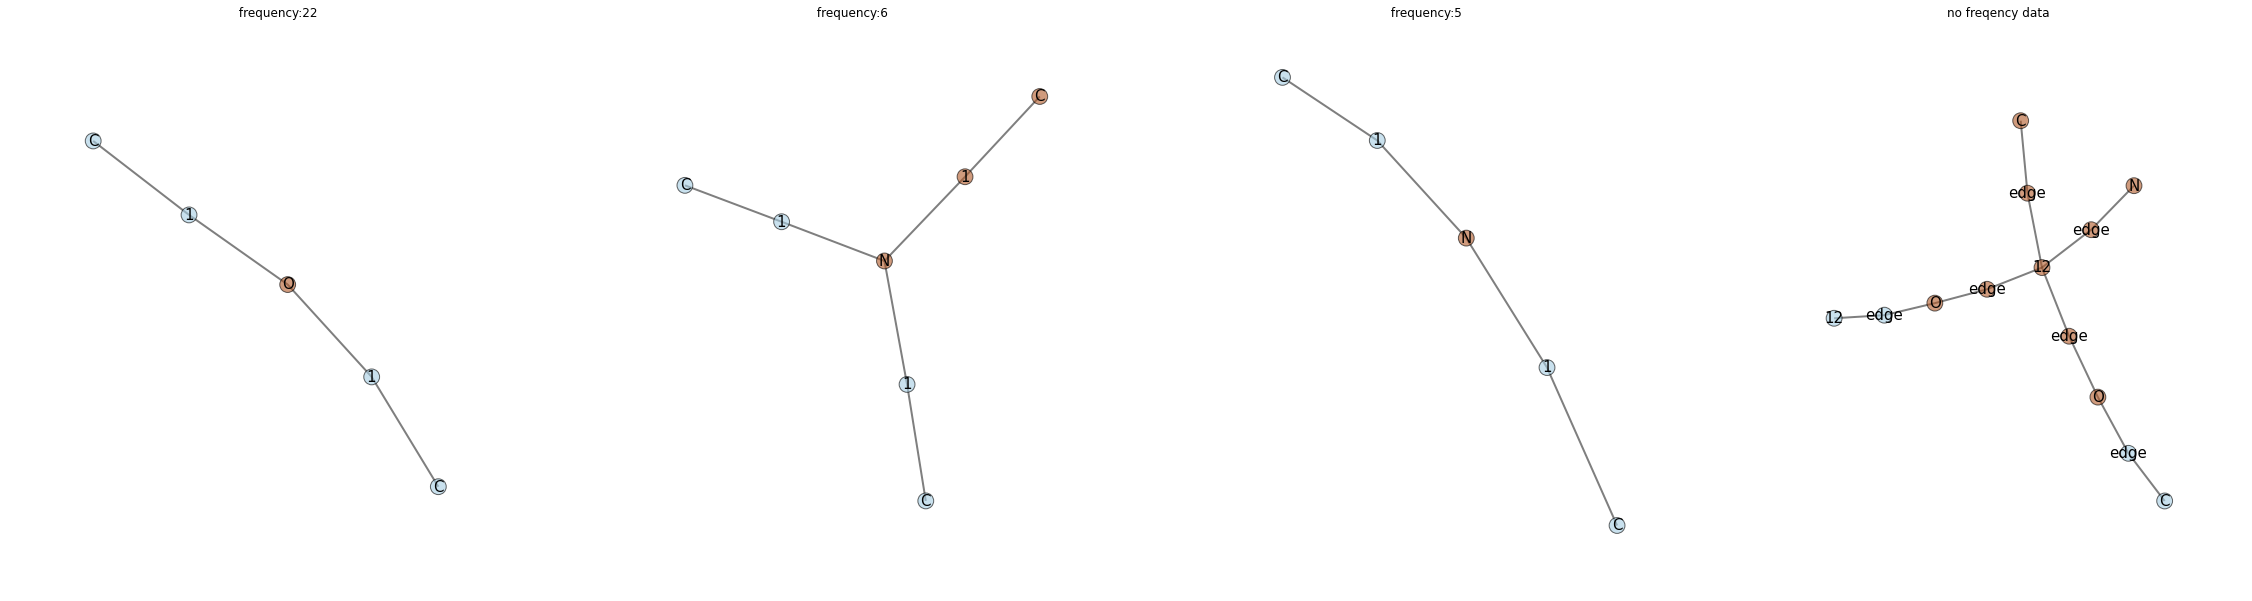

interface id: 860358 [19 options]


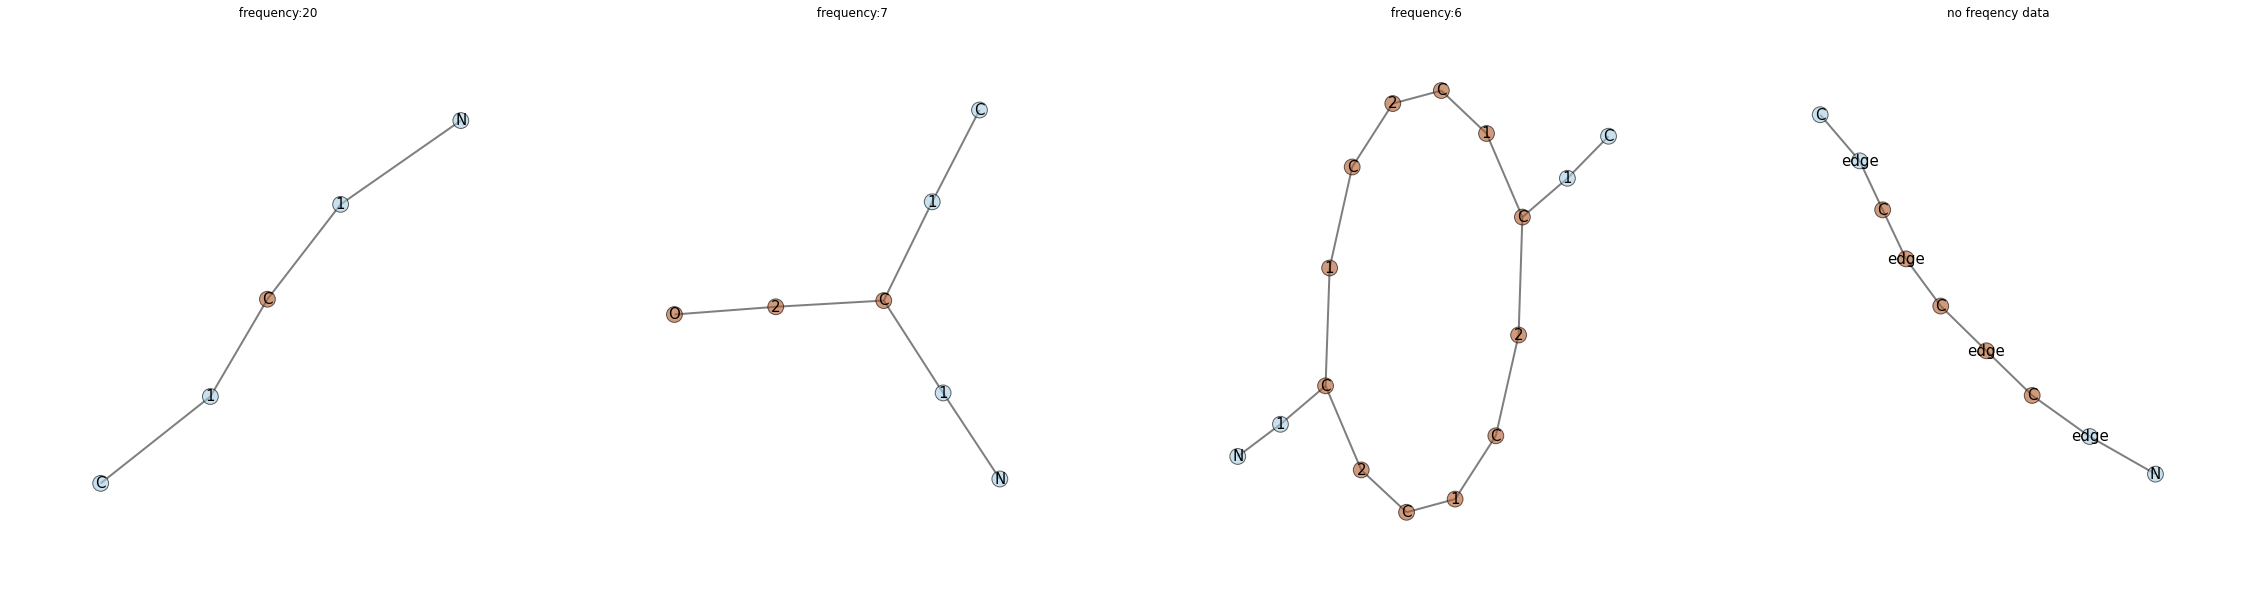

interface id: 271610 [18 options]


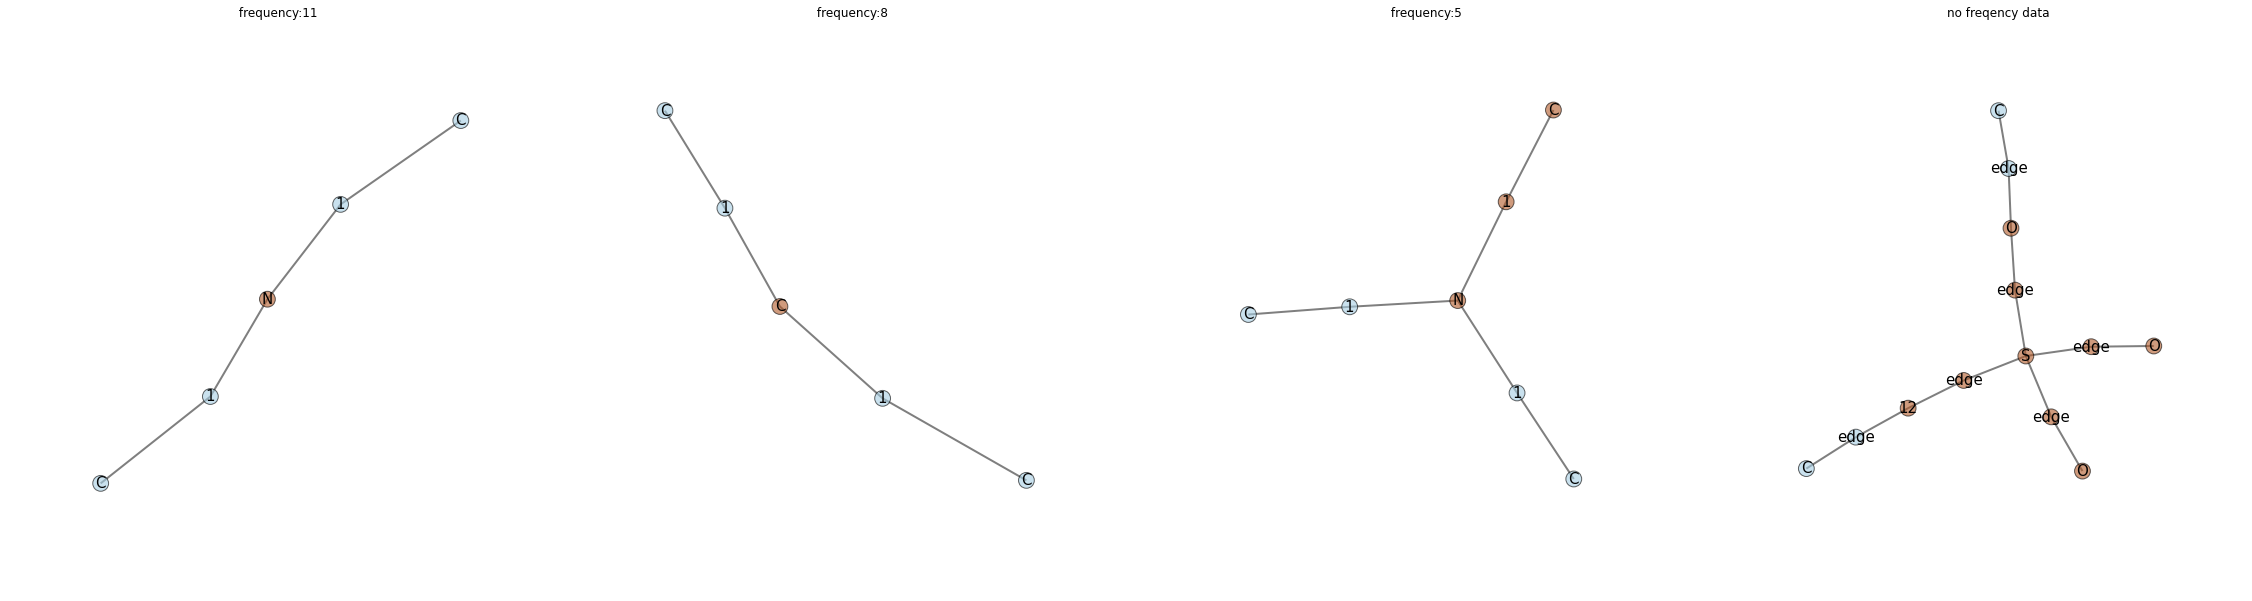

In [6]:
#draw production rules
draw.draw_grammar(sampler.lsgg.productions,n_productions=7,n_graphs_per_production=3,
                     n_graphs_per_line=6, size=10, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=250)

    

Loaded model: tmp/mole_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
base_thickness_list: [2]
batch_size: 1
    burnin: 0
complexity: 3
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000288704460406, average=False, class_weight=None,
       epsilon=0.1, eta0=0.377282800975, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=46, n_jobs=1,
       penalty='l1', power_t=0.583689262638, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7f9c720f3248>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f9c720f31b8>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: 0.02
improving_threshold: 50
keep_duplicates: True
      lsgg: <graphlearn.abstract_graphs.ubergraphlearn.UberGrammar object at 0

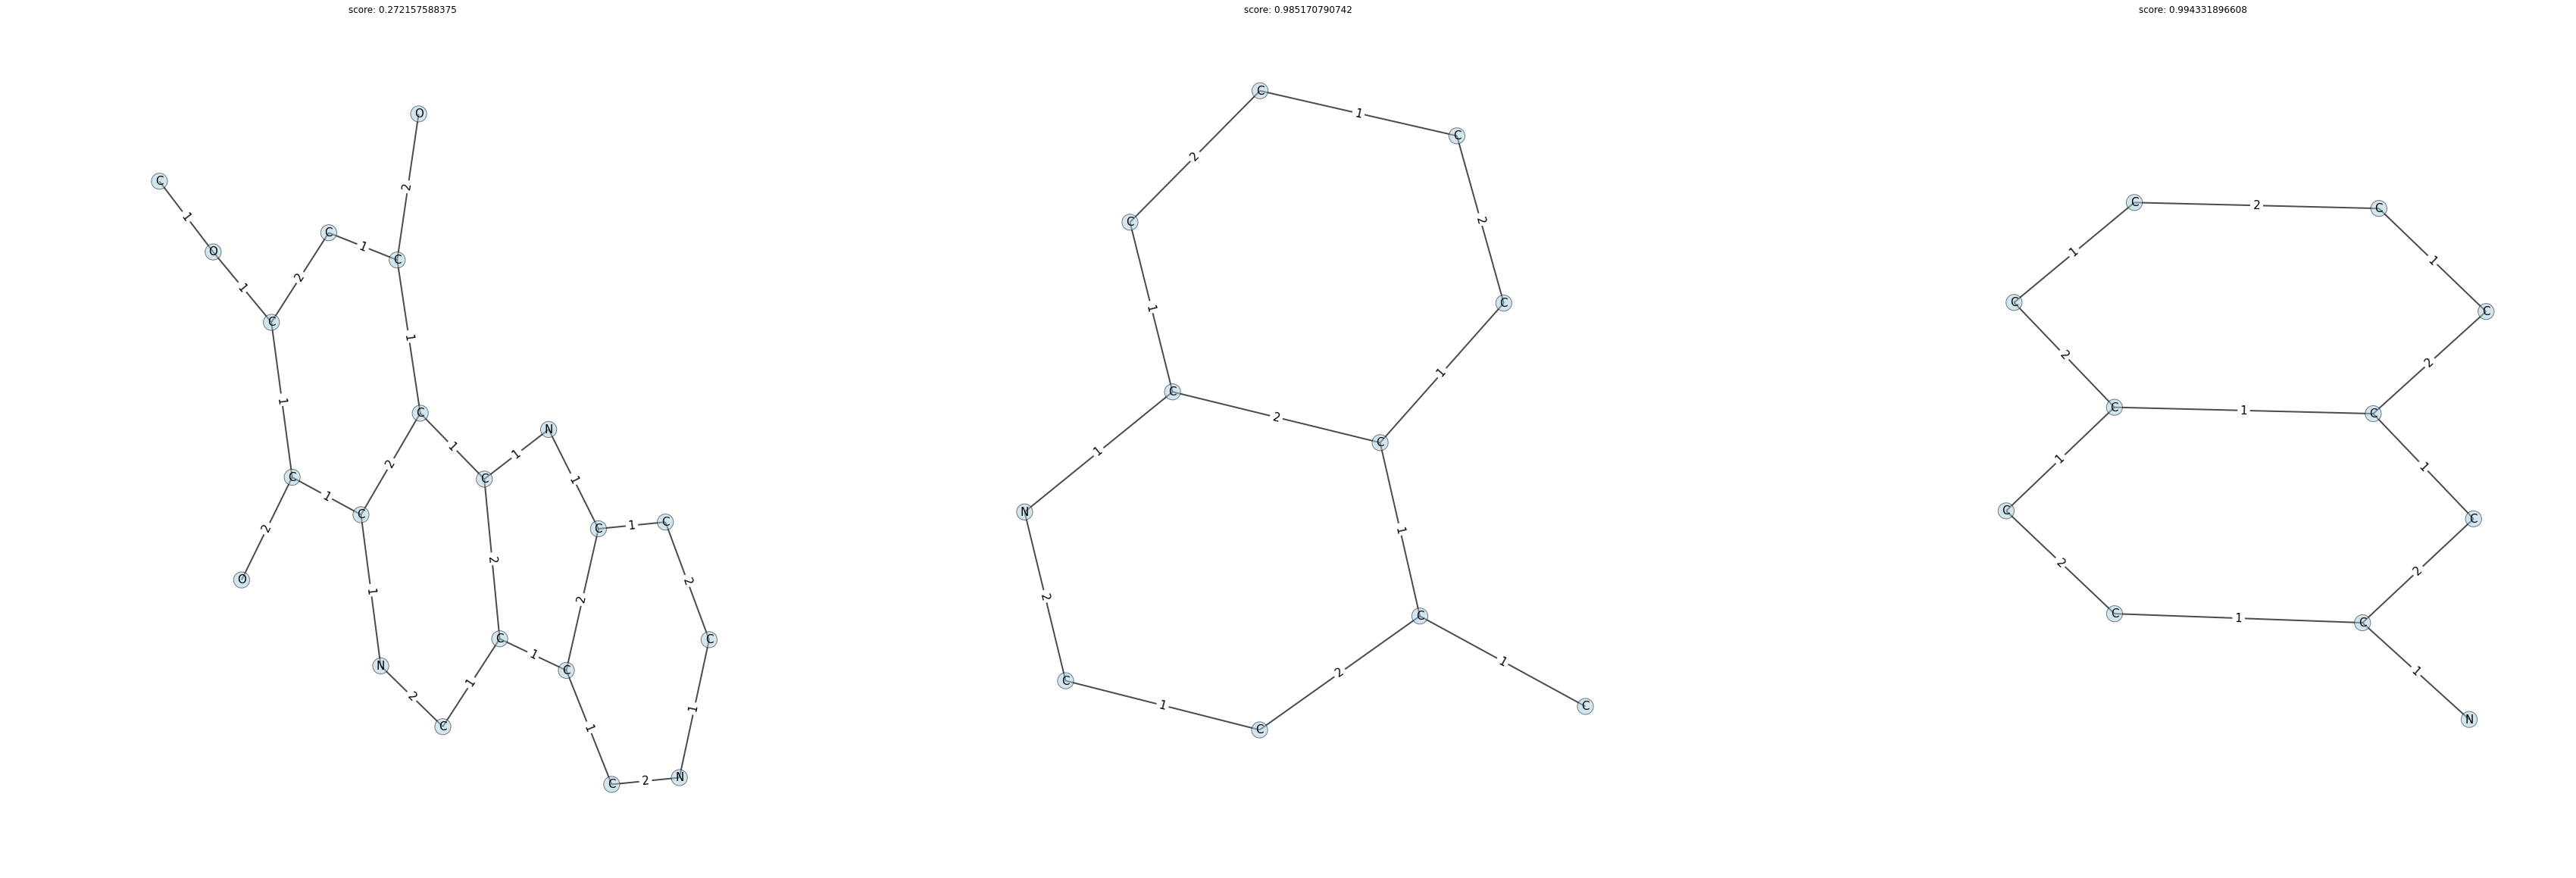

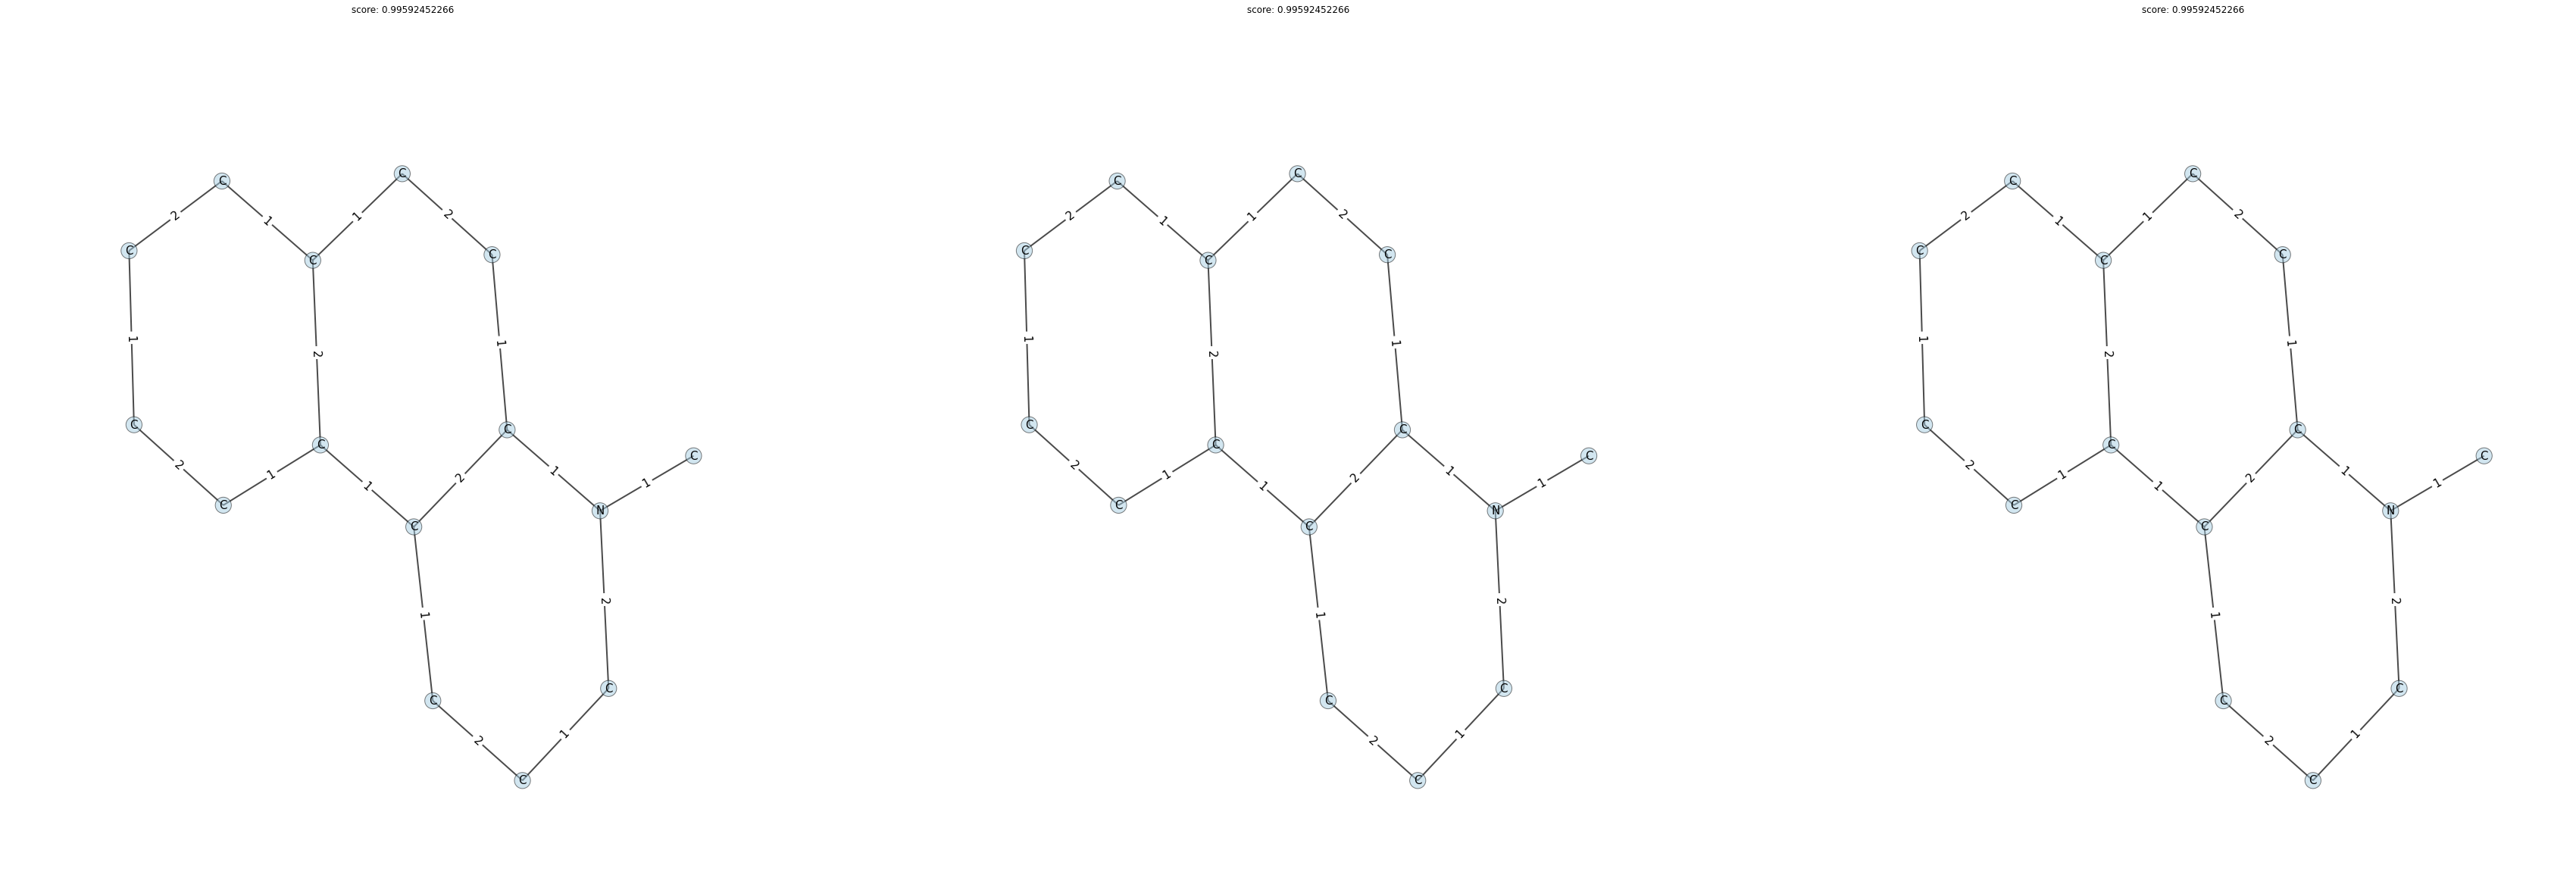

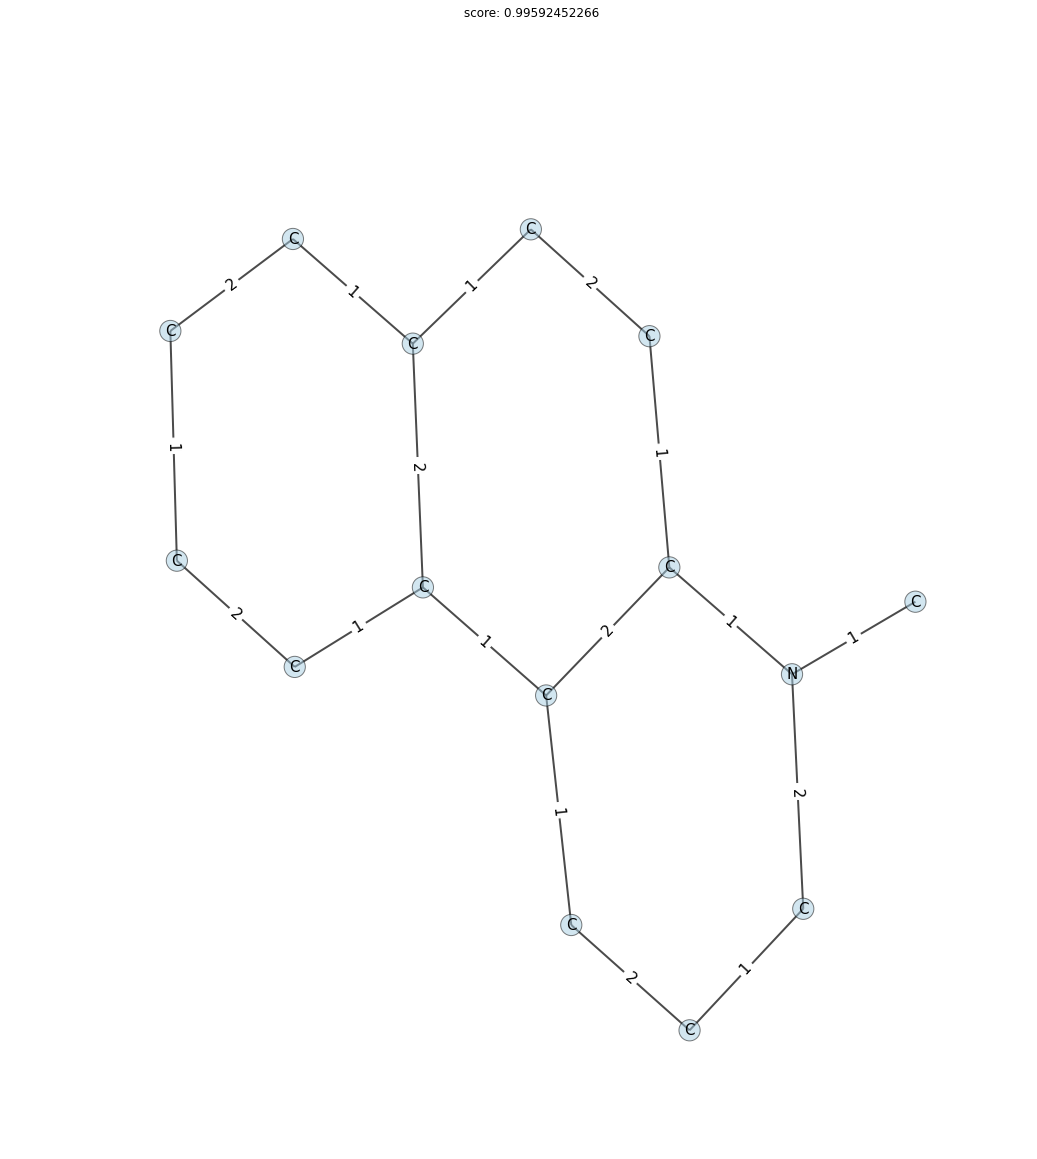

_propose_graph: iteration 0 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 11 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 1 ; origina

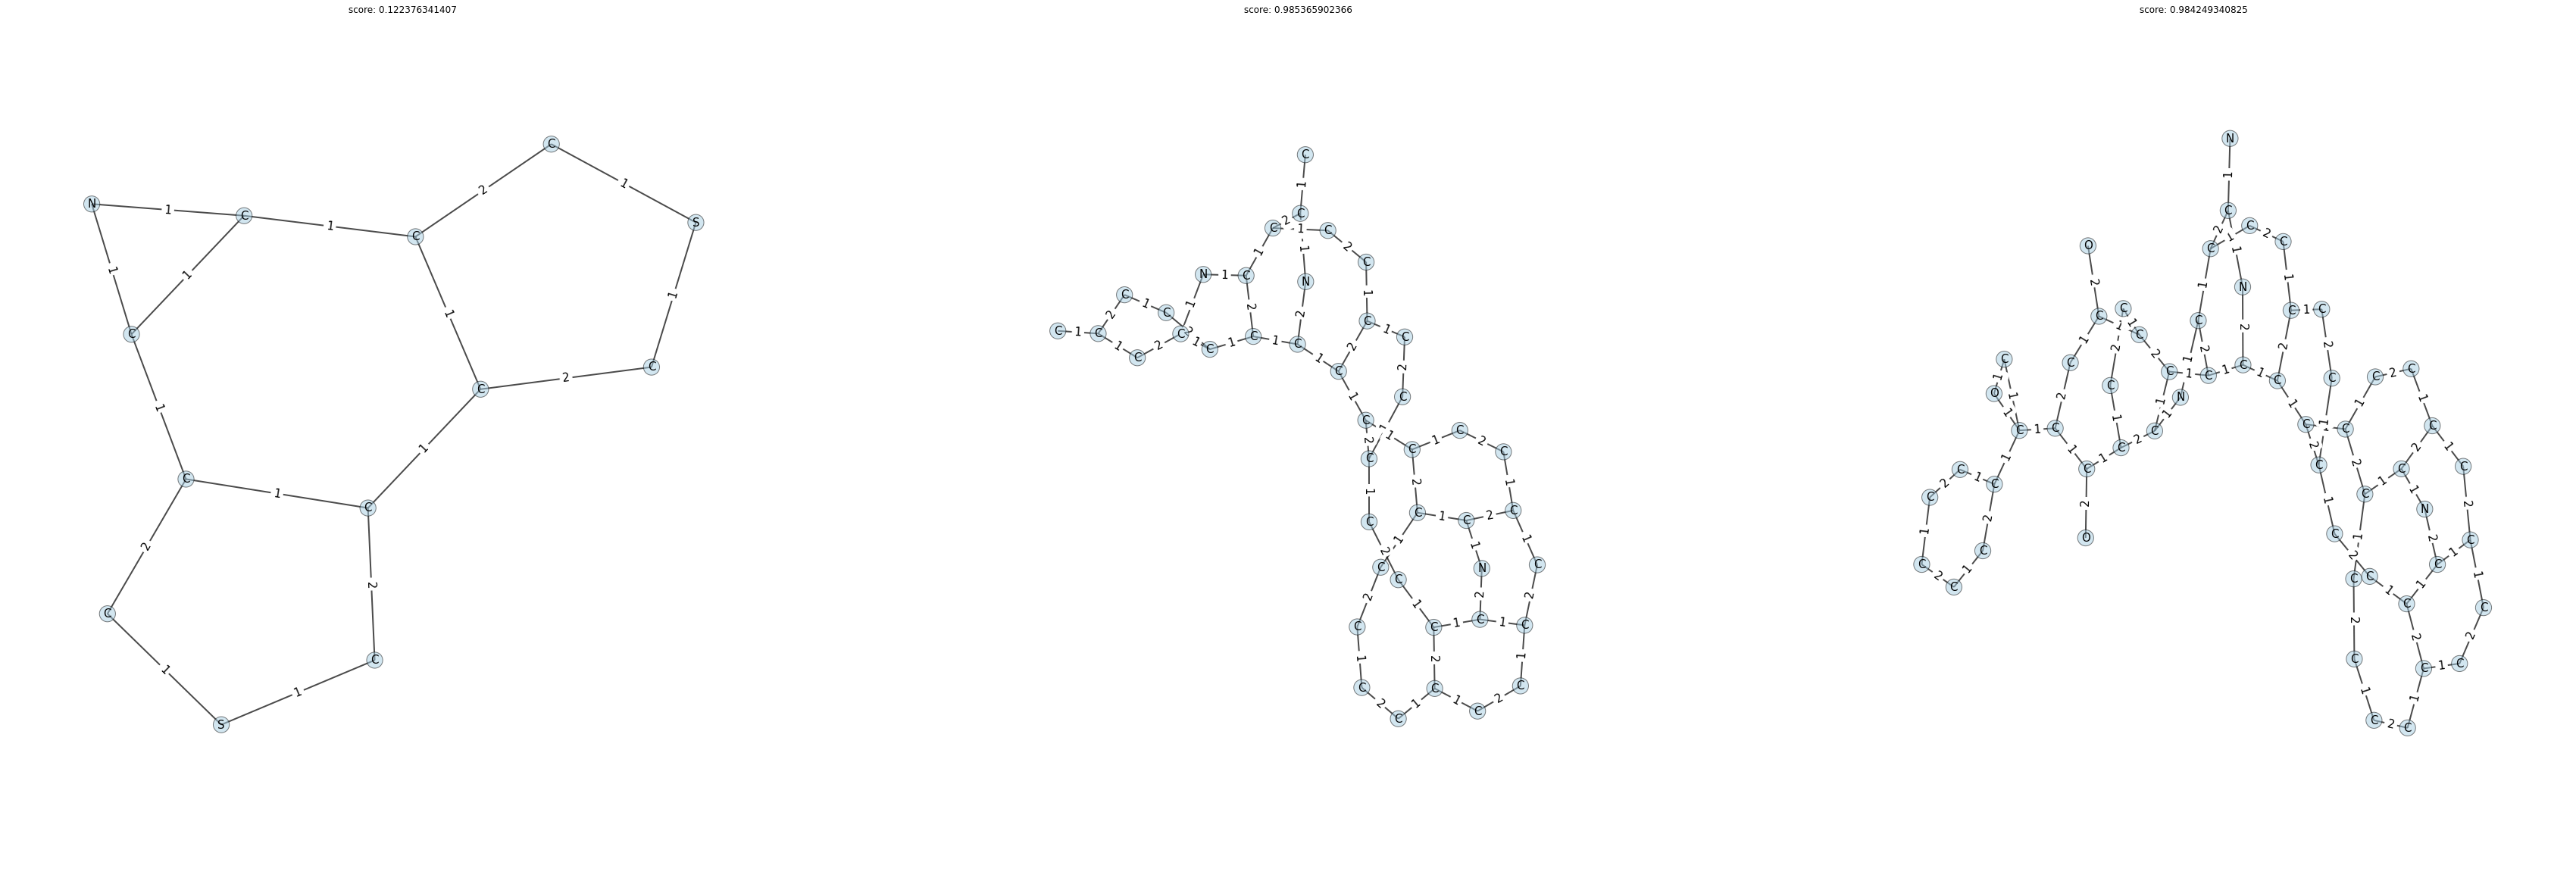

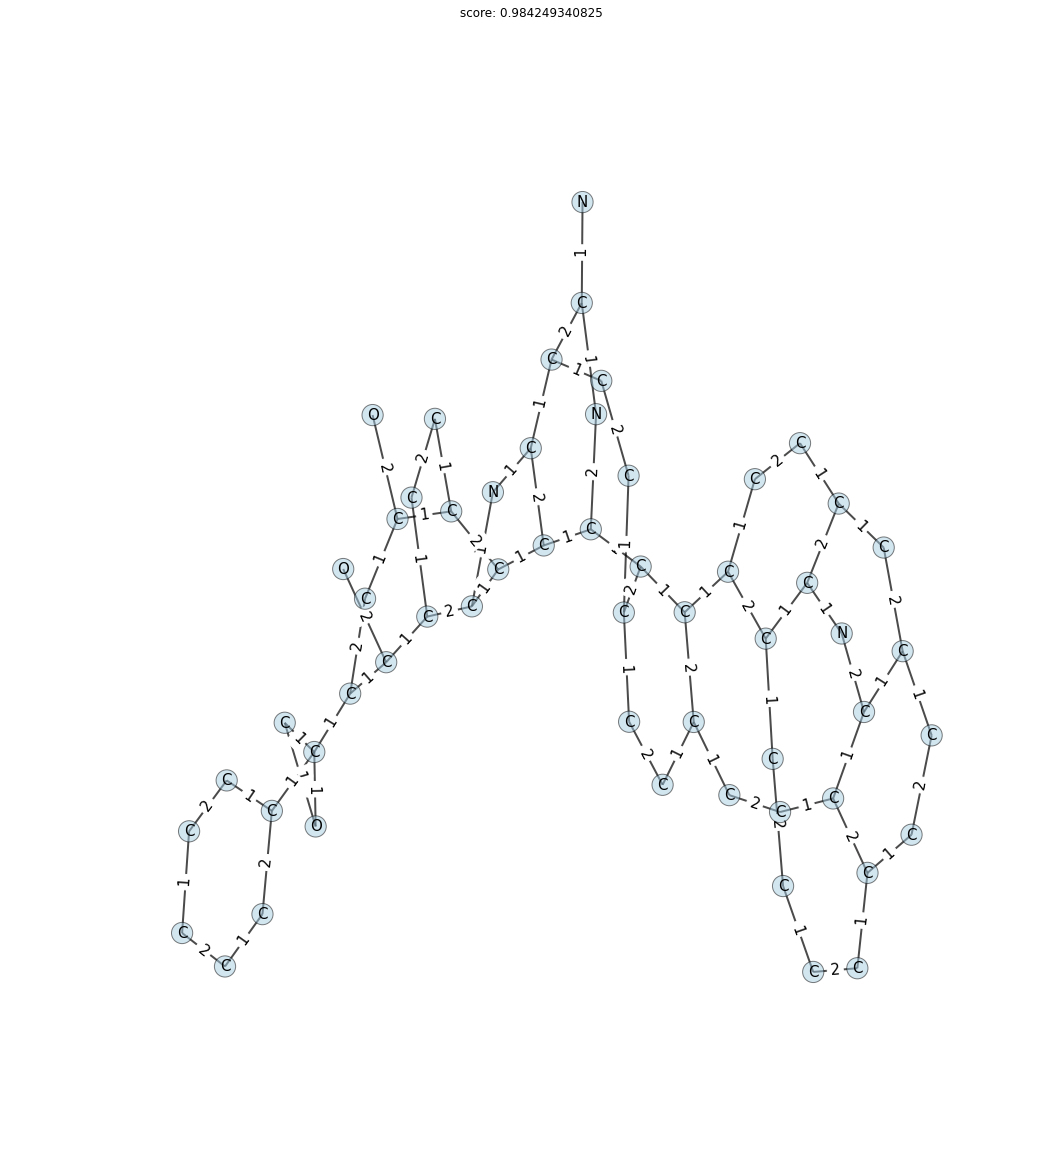

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 18 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 19 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 17 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 2 ; orig

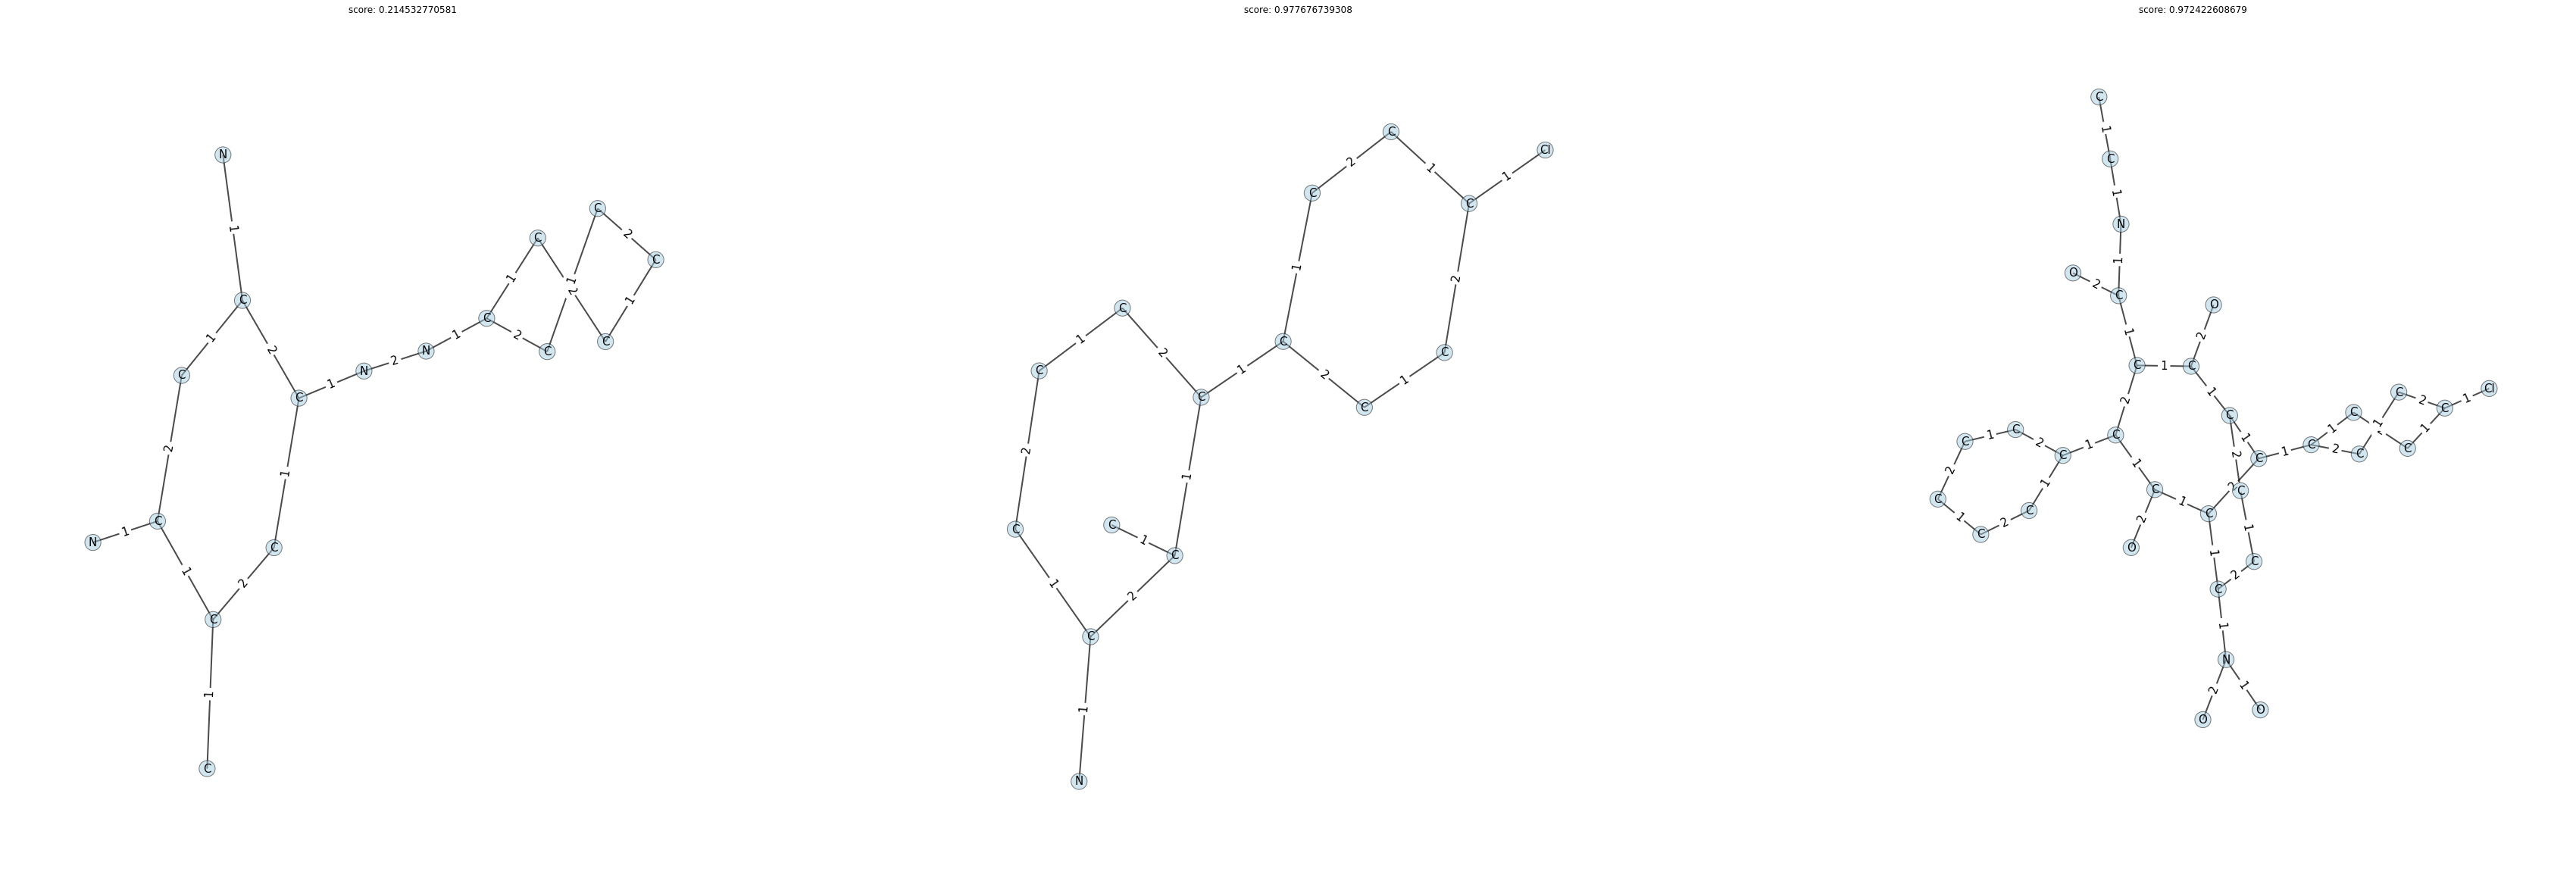

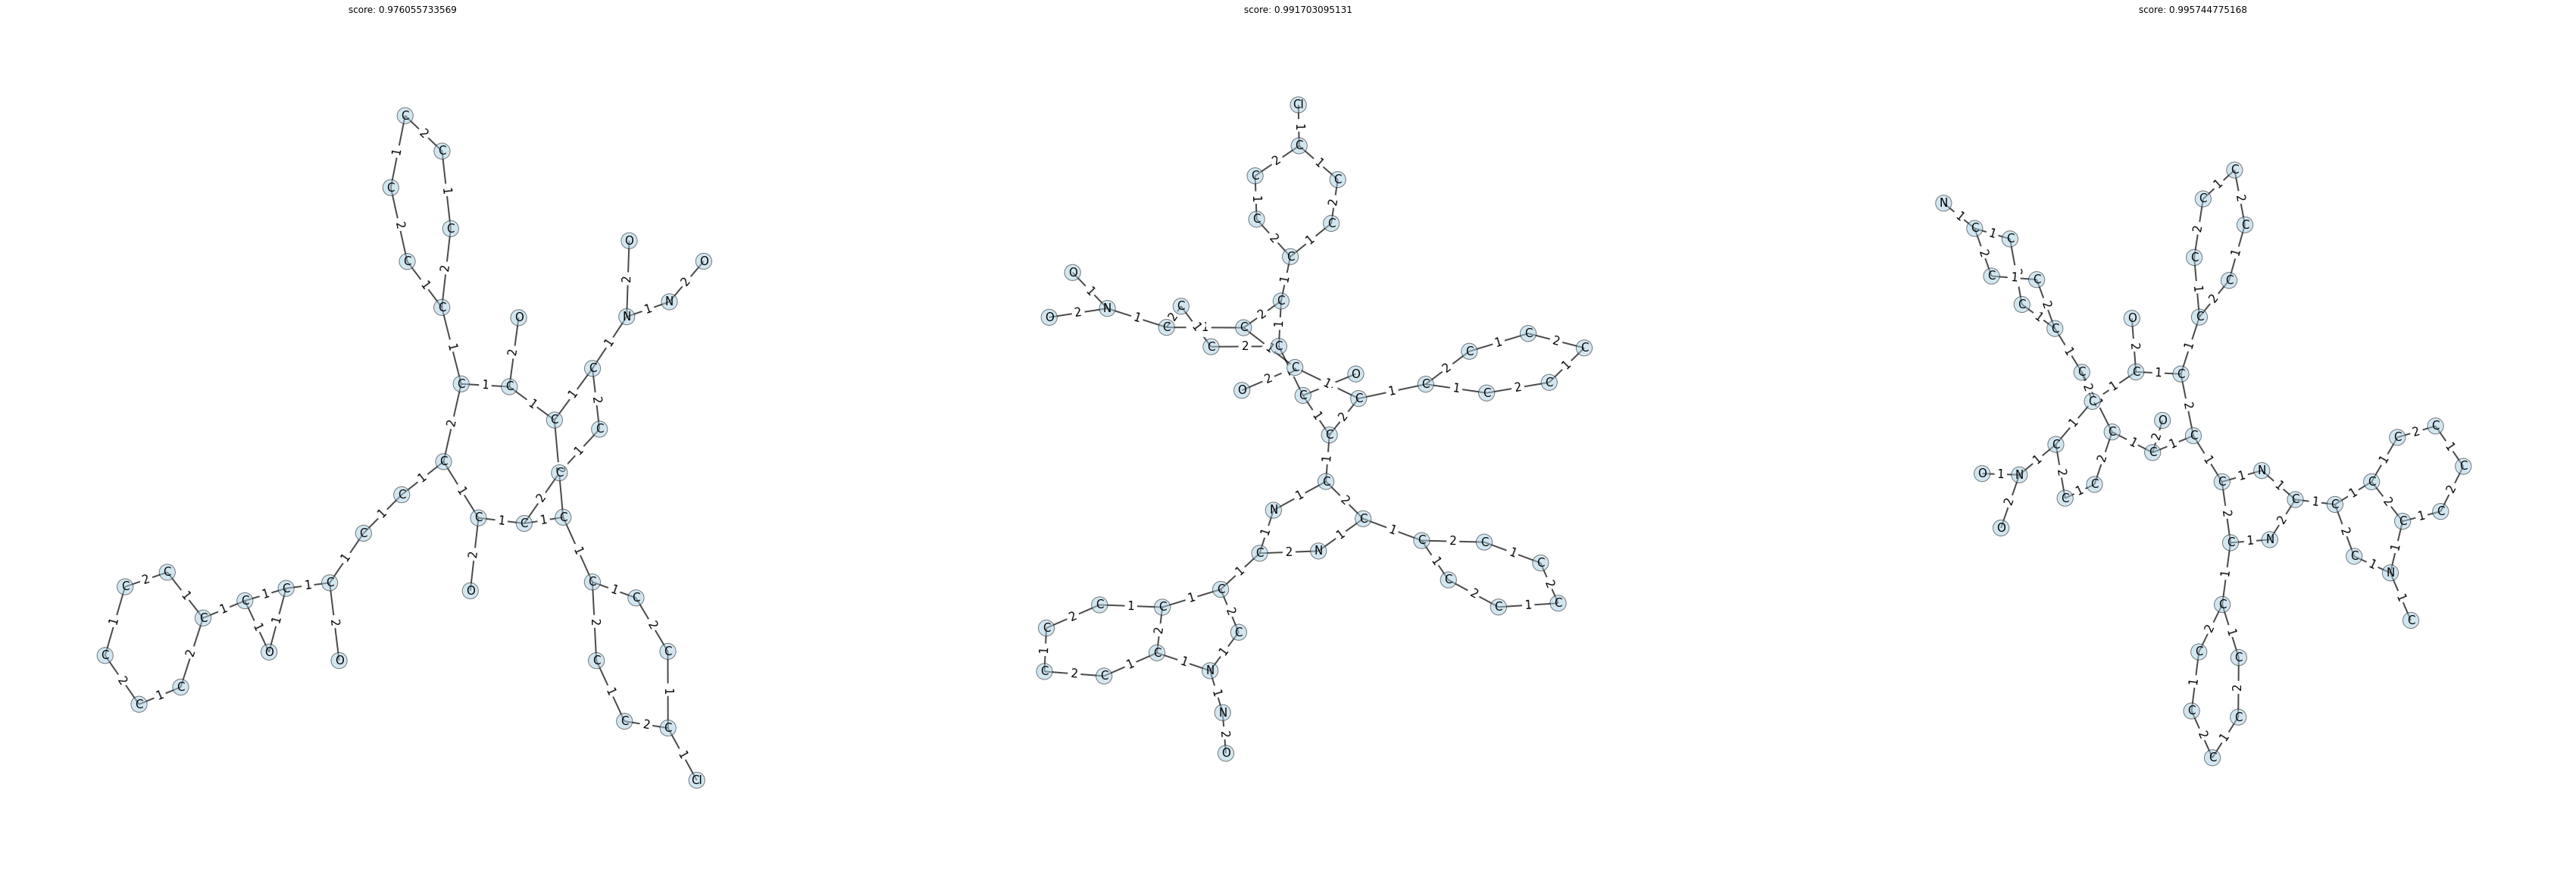

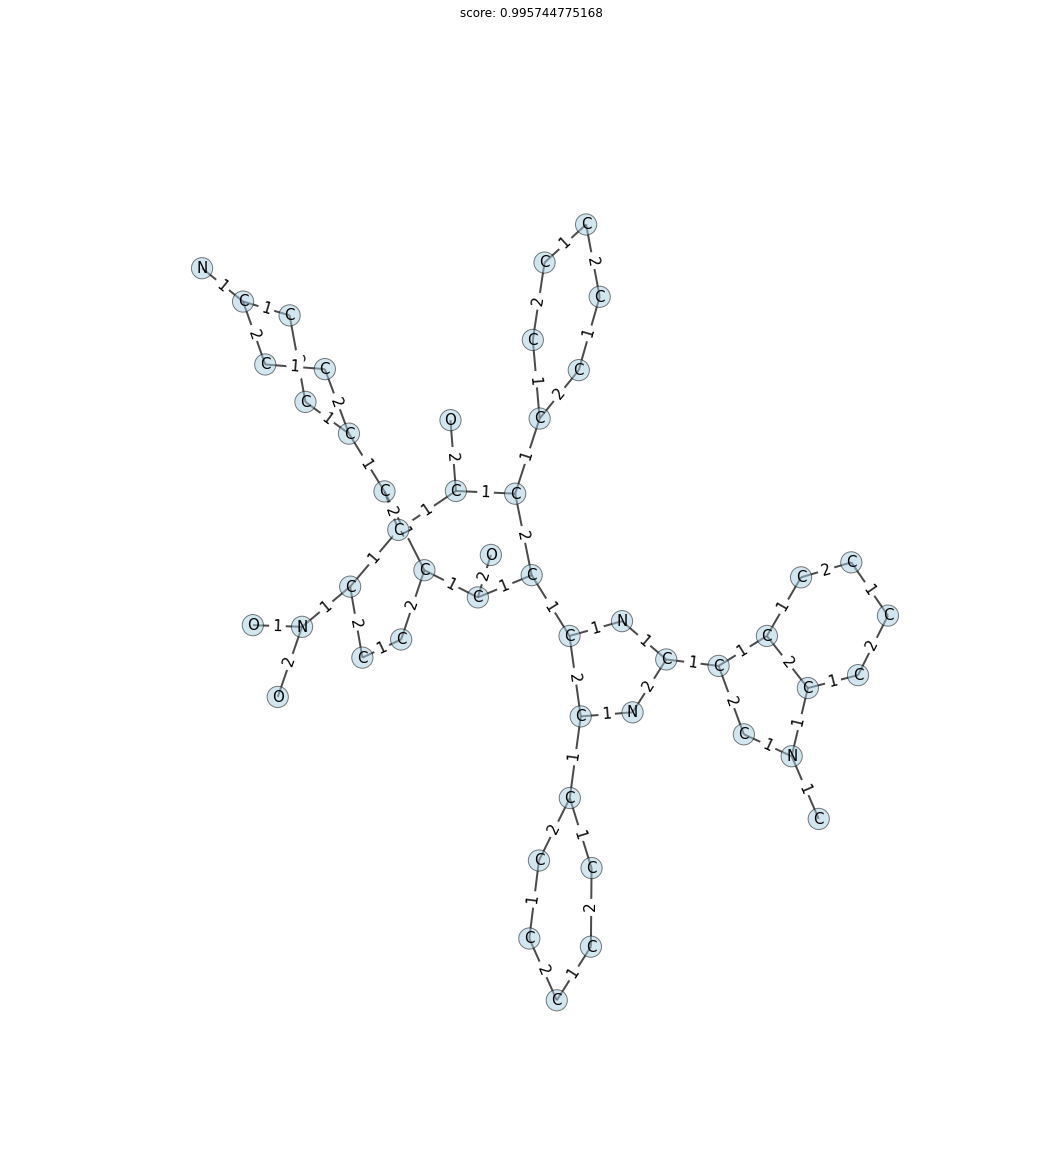

_propose_graph: iteration 0 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 11 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 27 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 27 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 6 ; origi

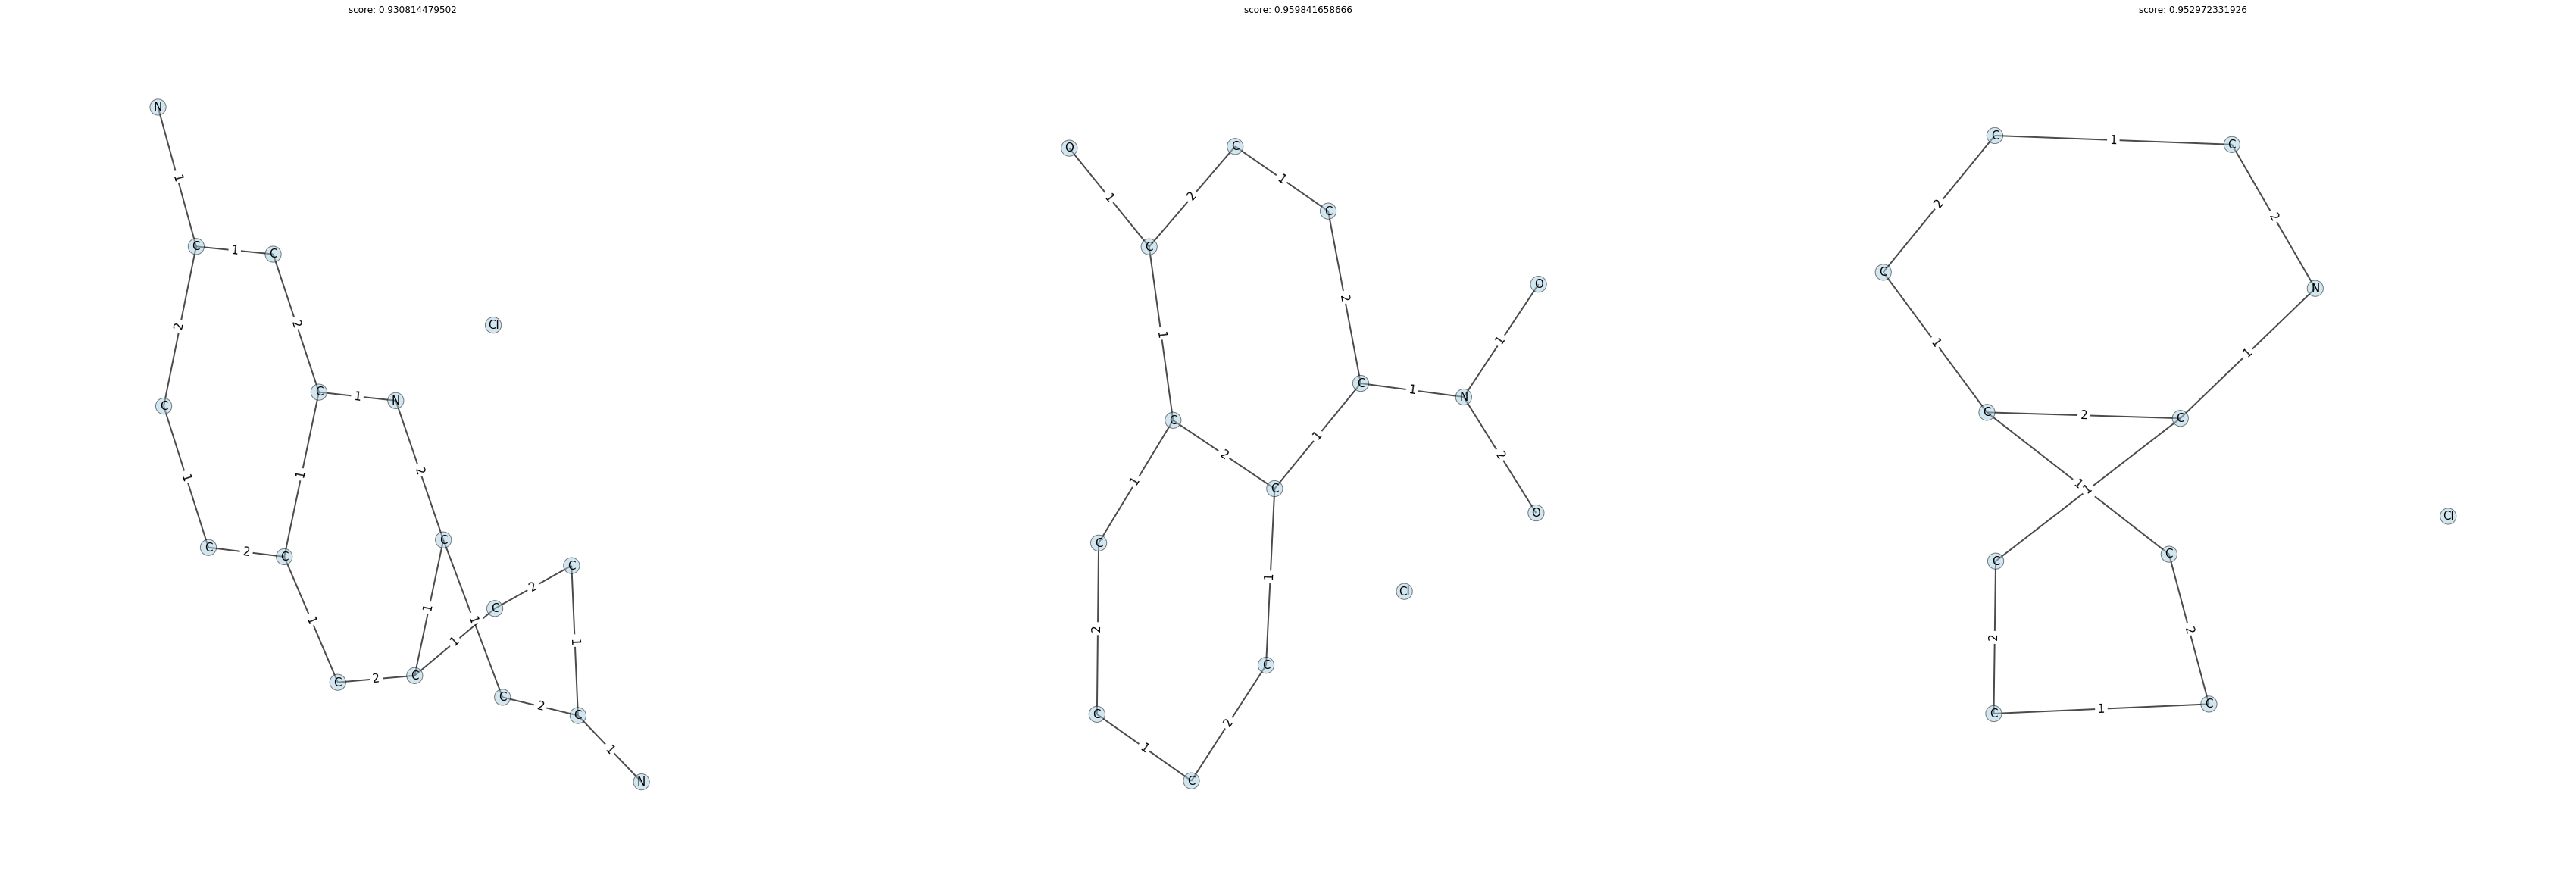

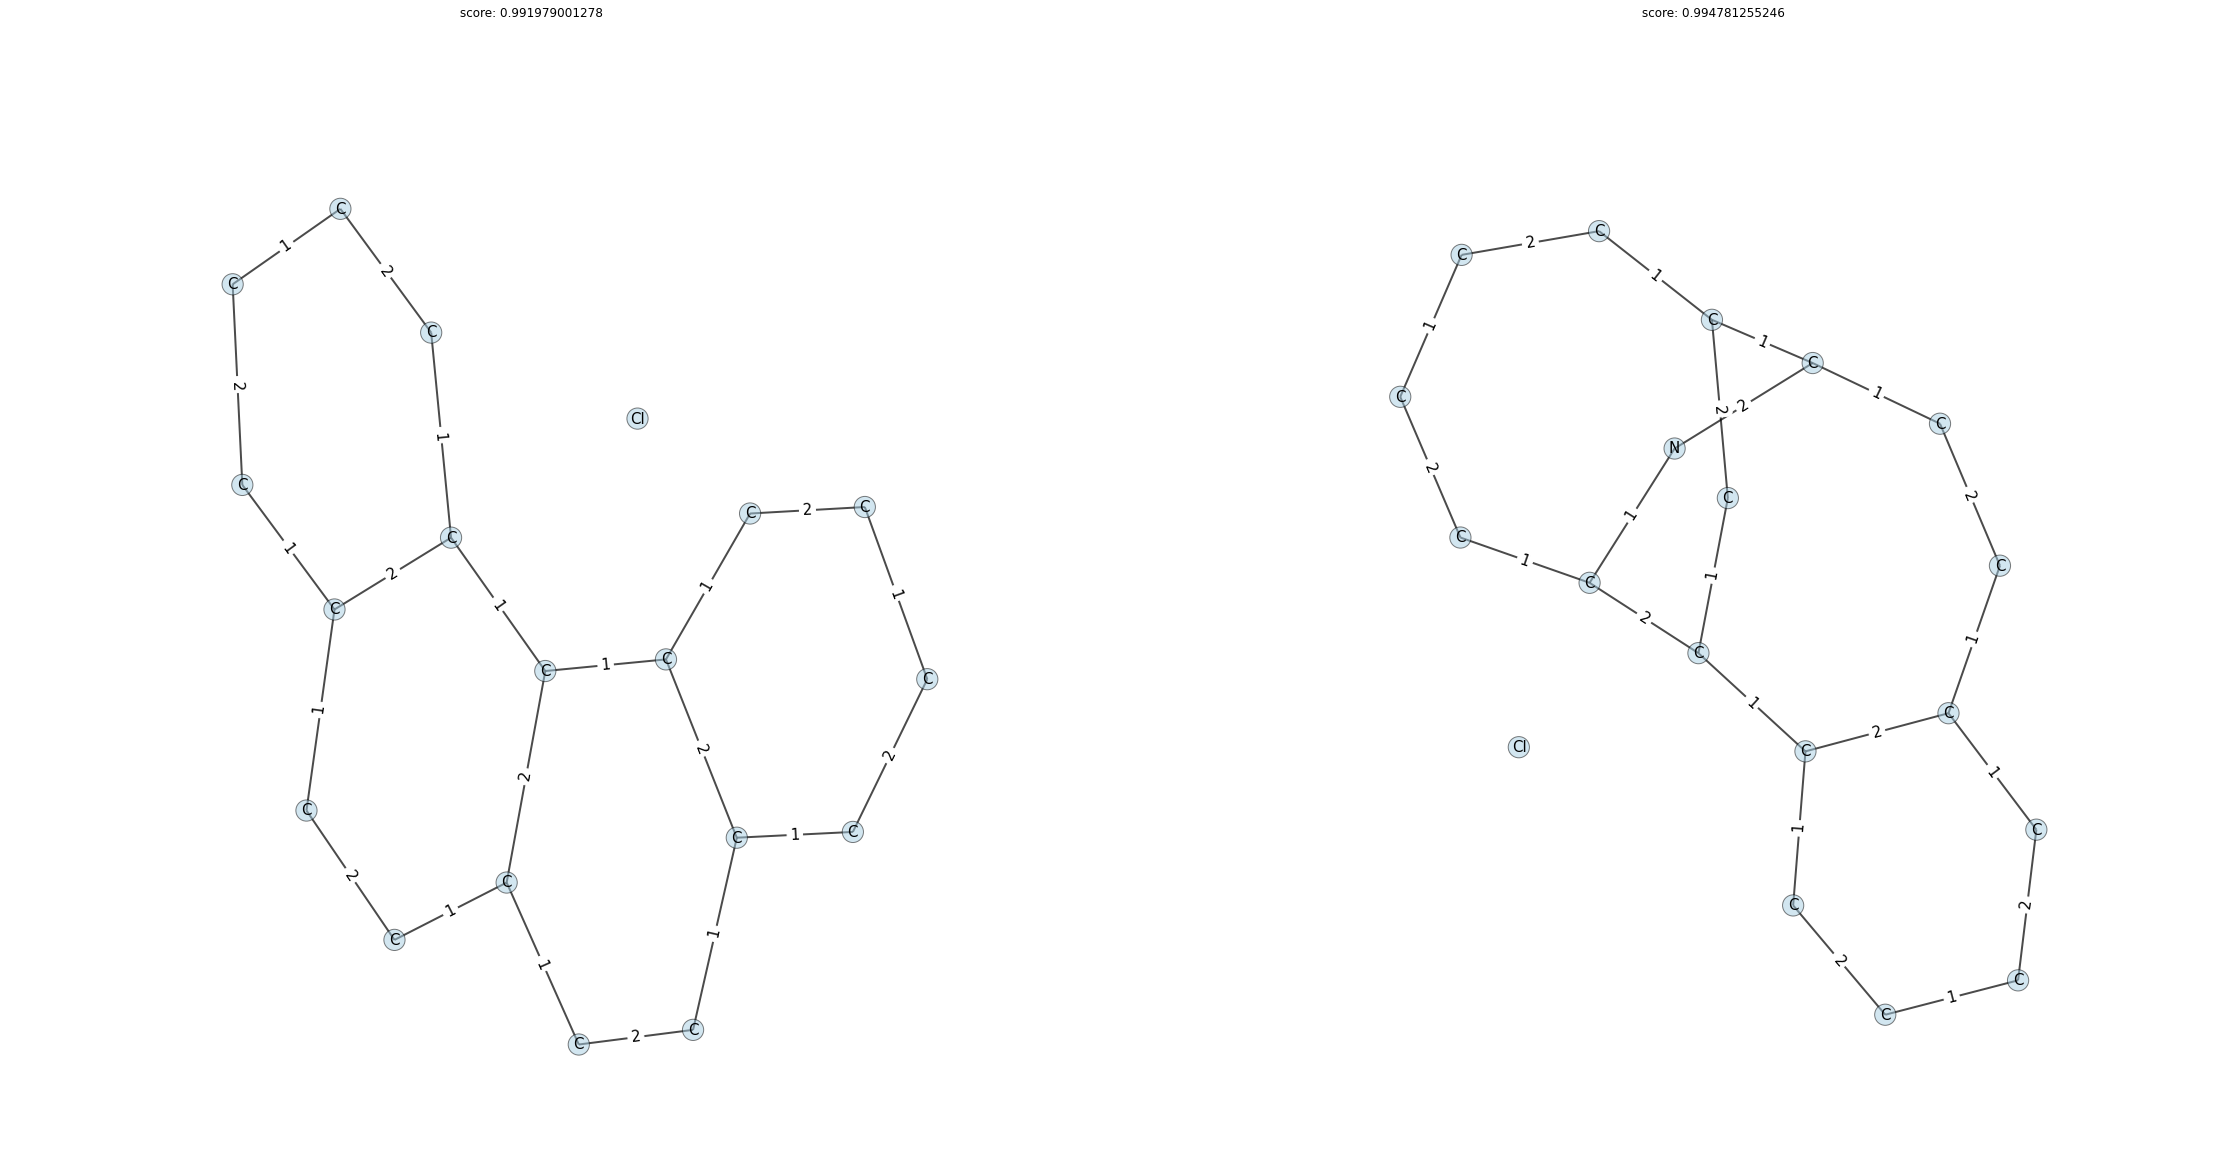

_propose_graph: iteration 0 ; core 0 of 27 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 5 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 3 ; original_ci

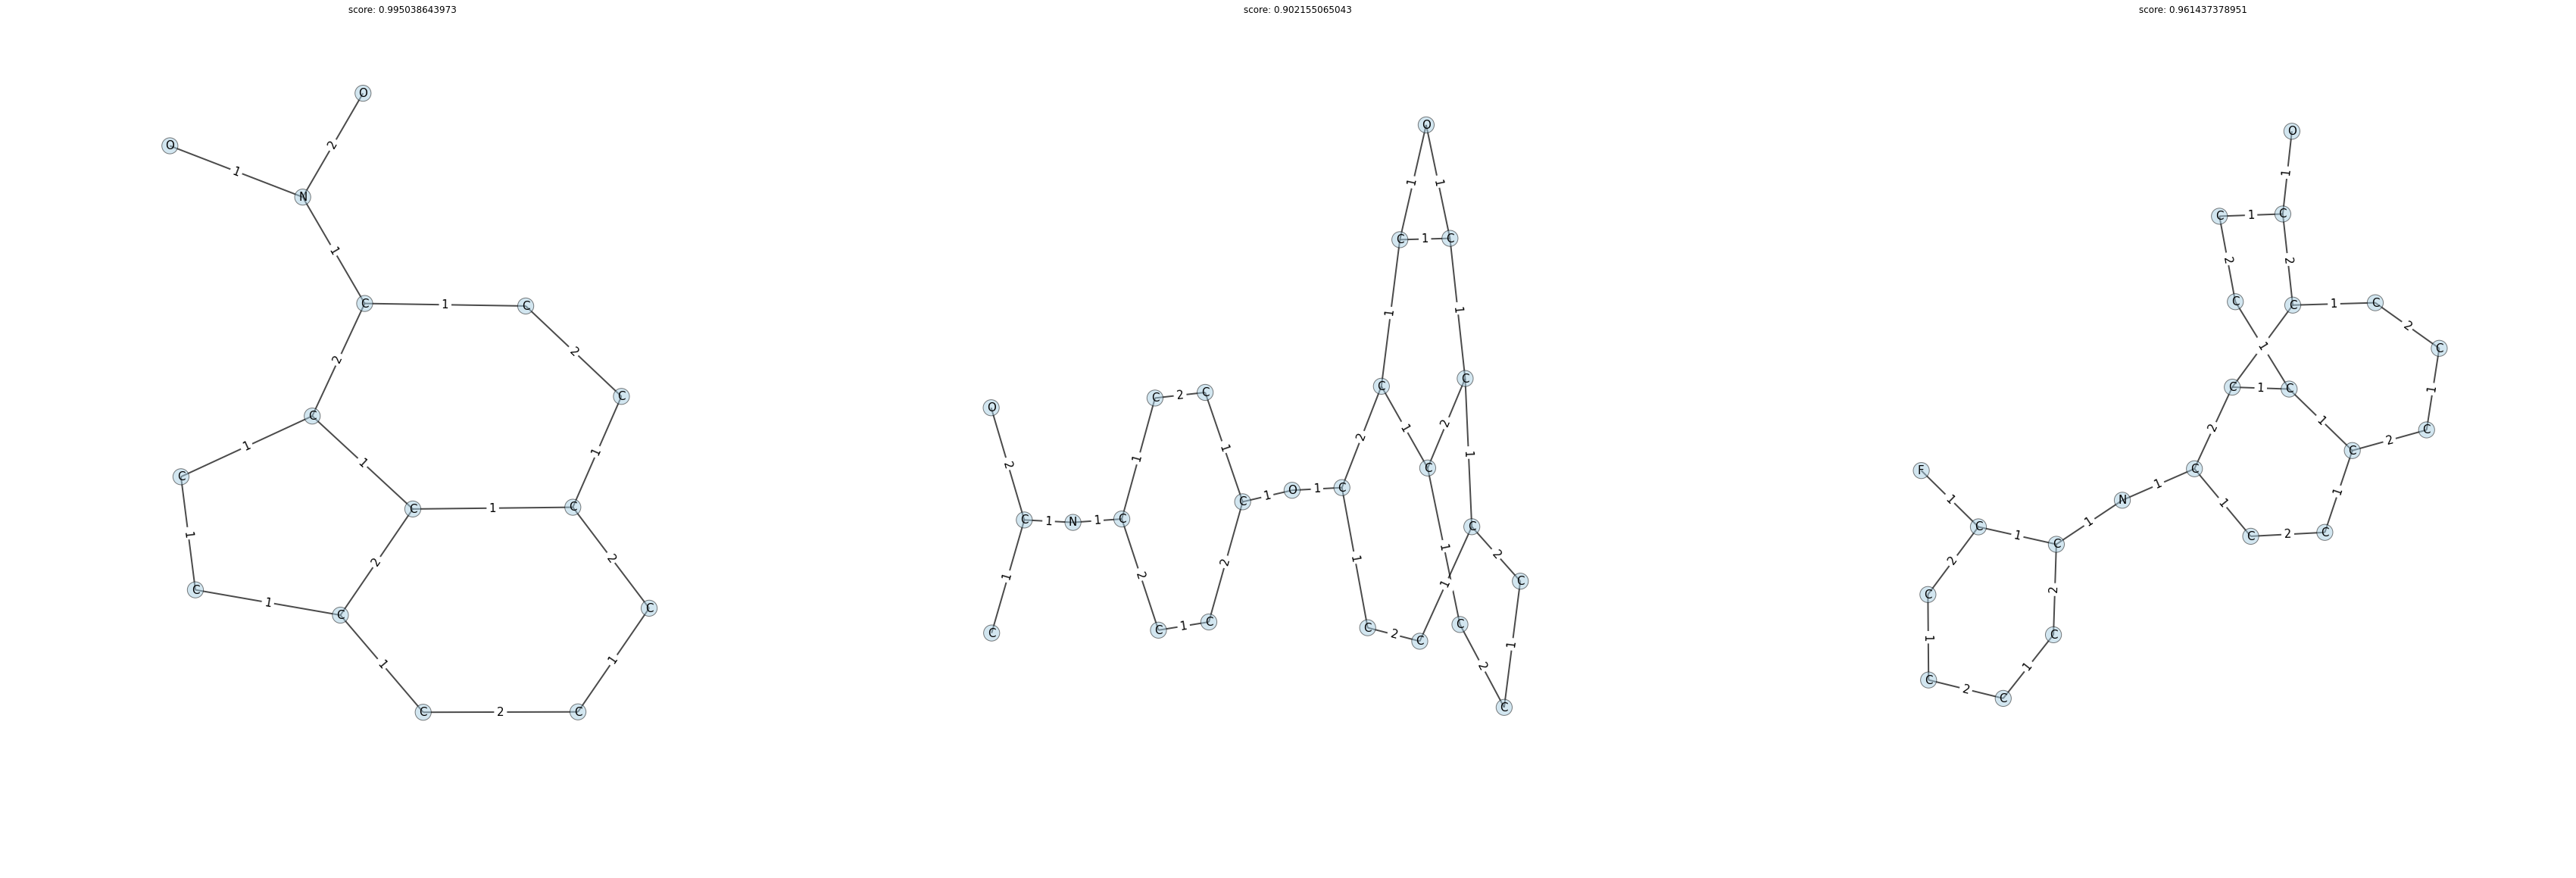

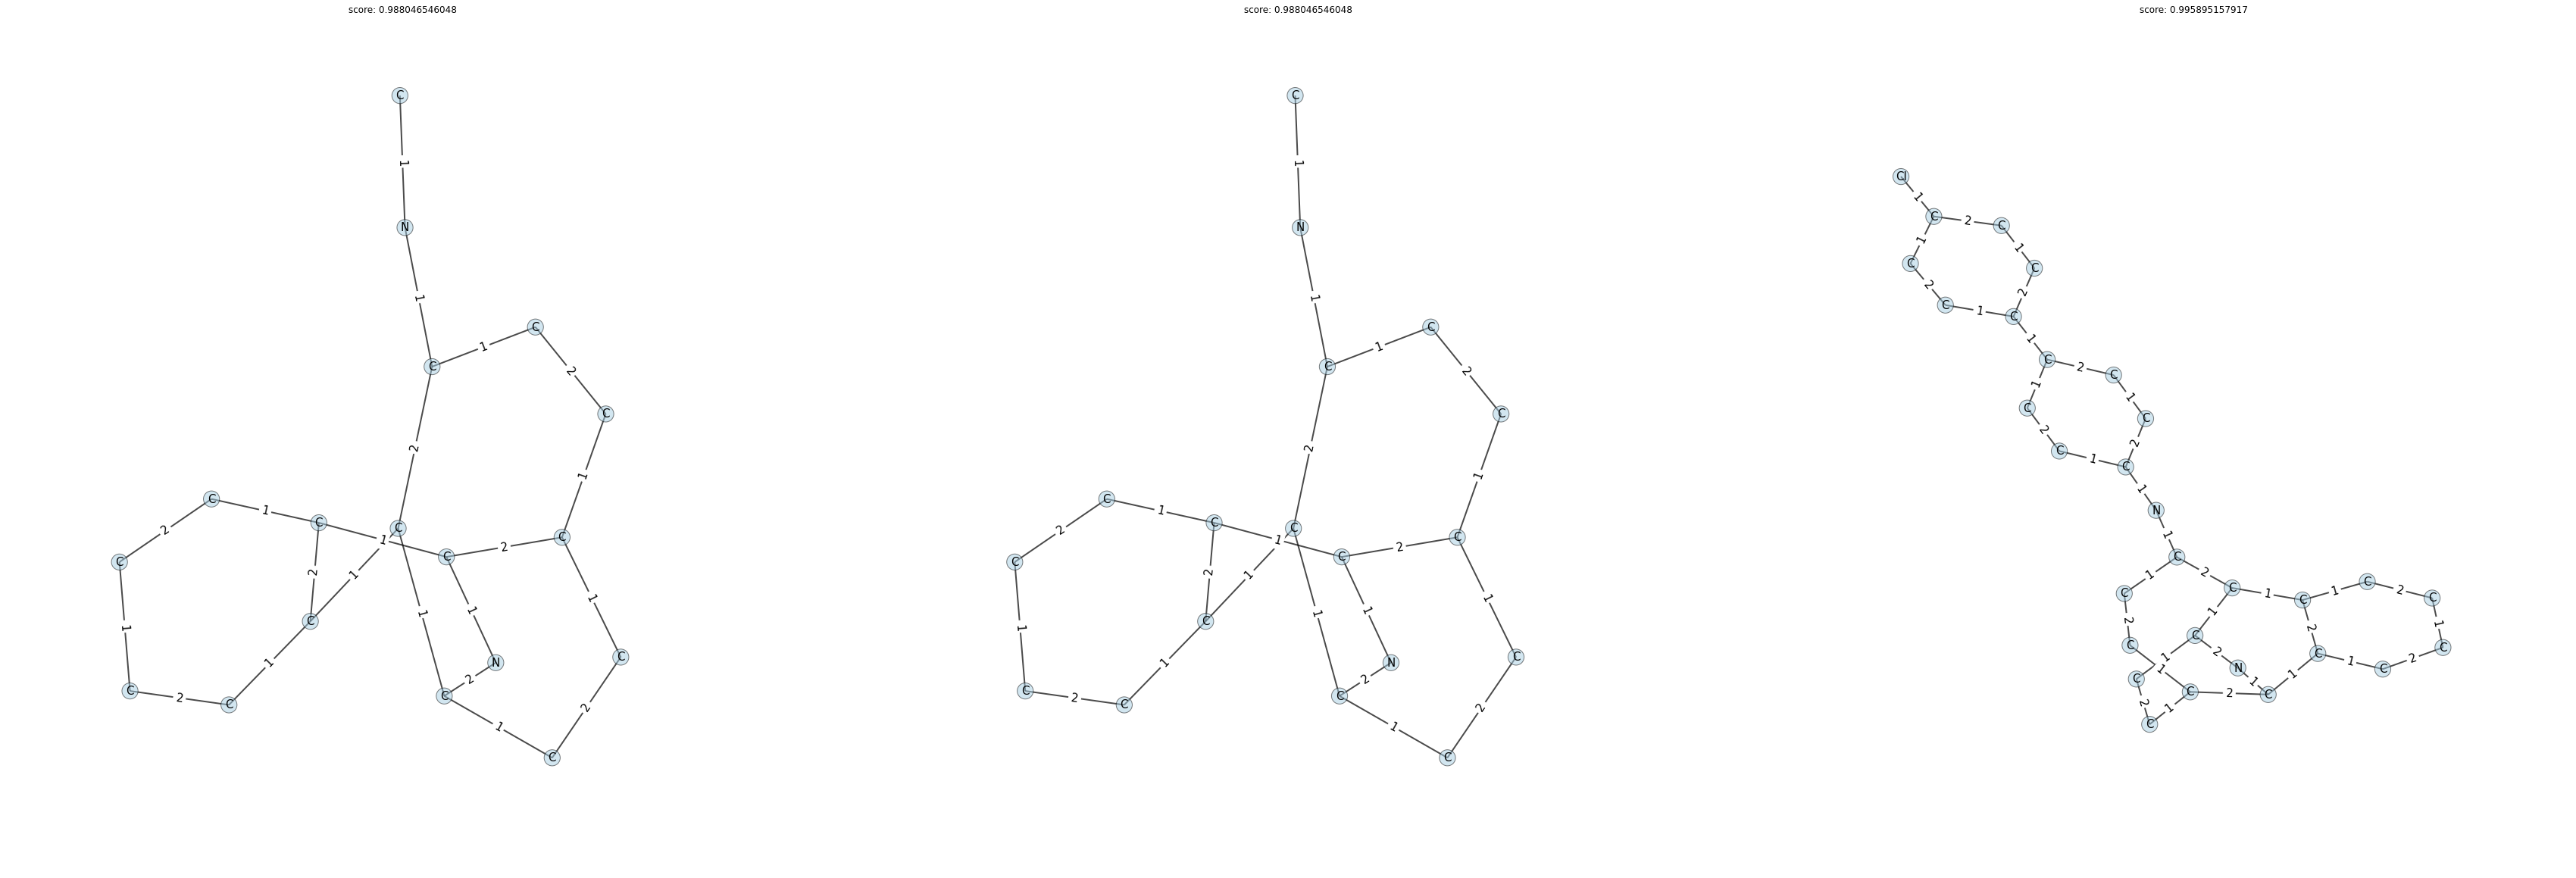

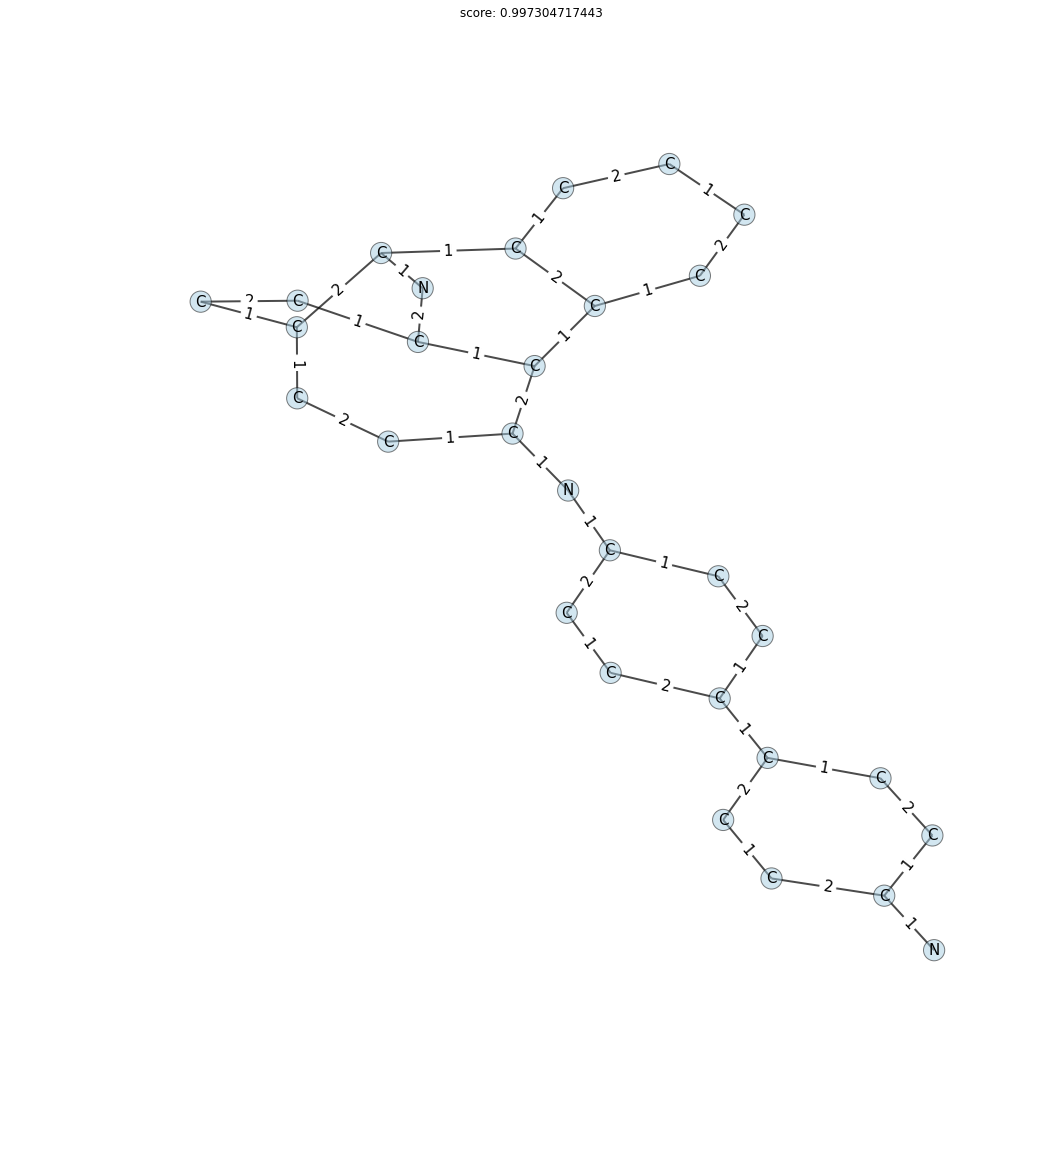

_propose_graph: iteration 0 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 27 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 36 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 29 ; origin

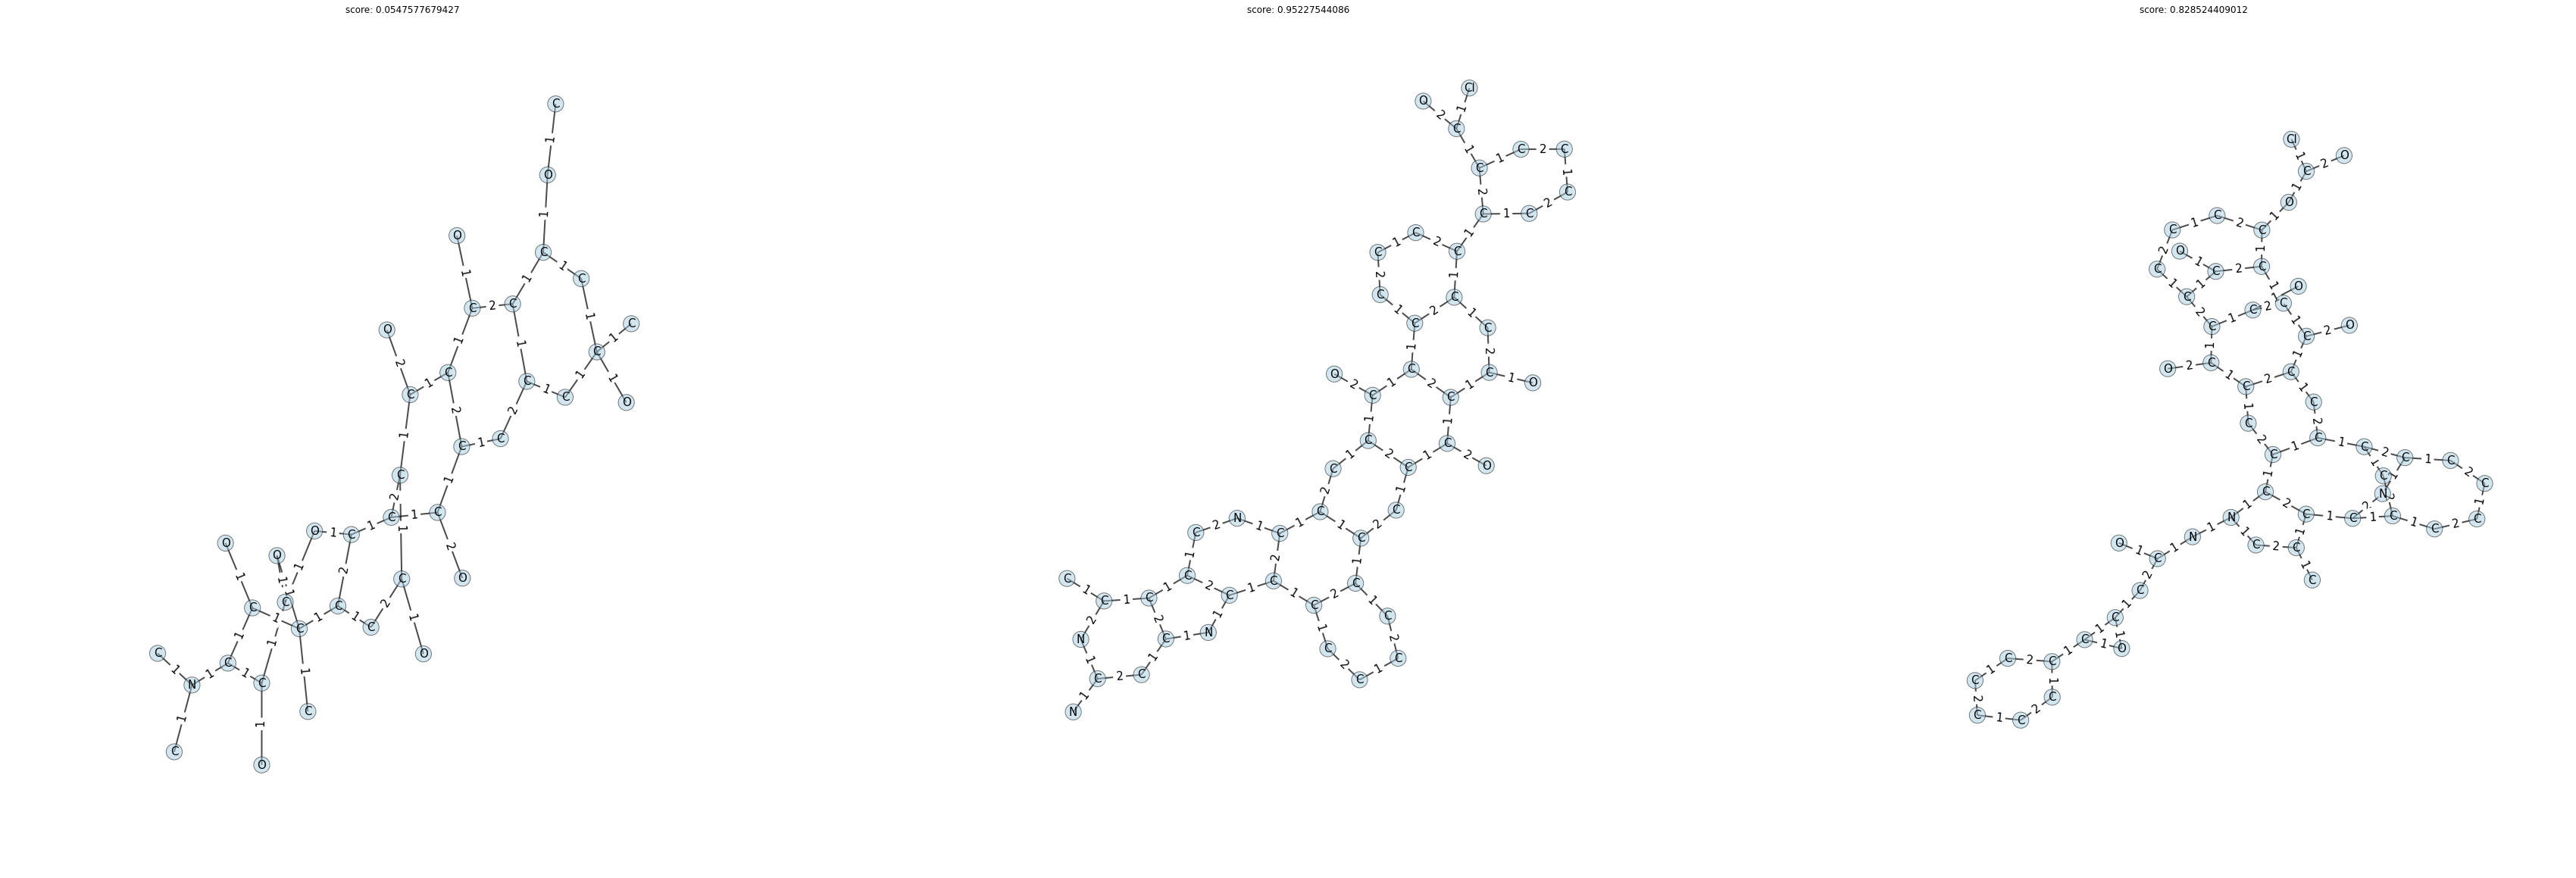

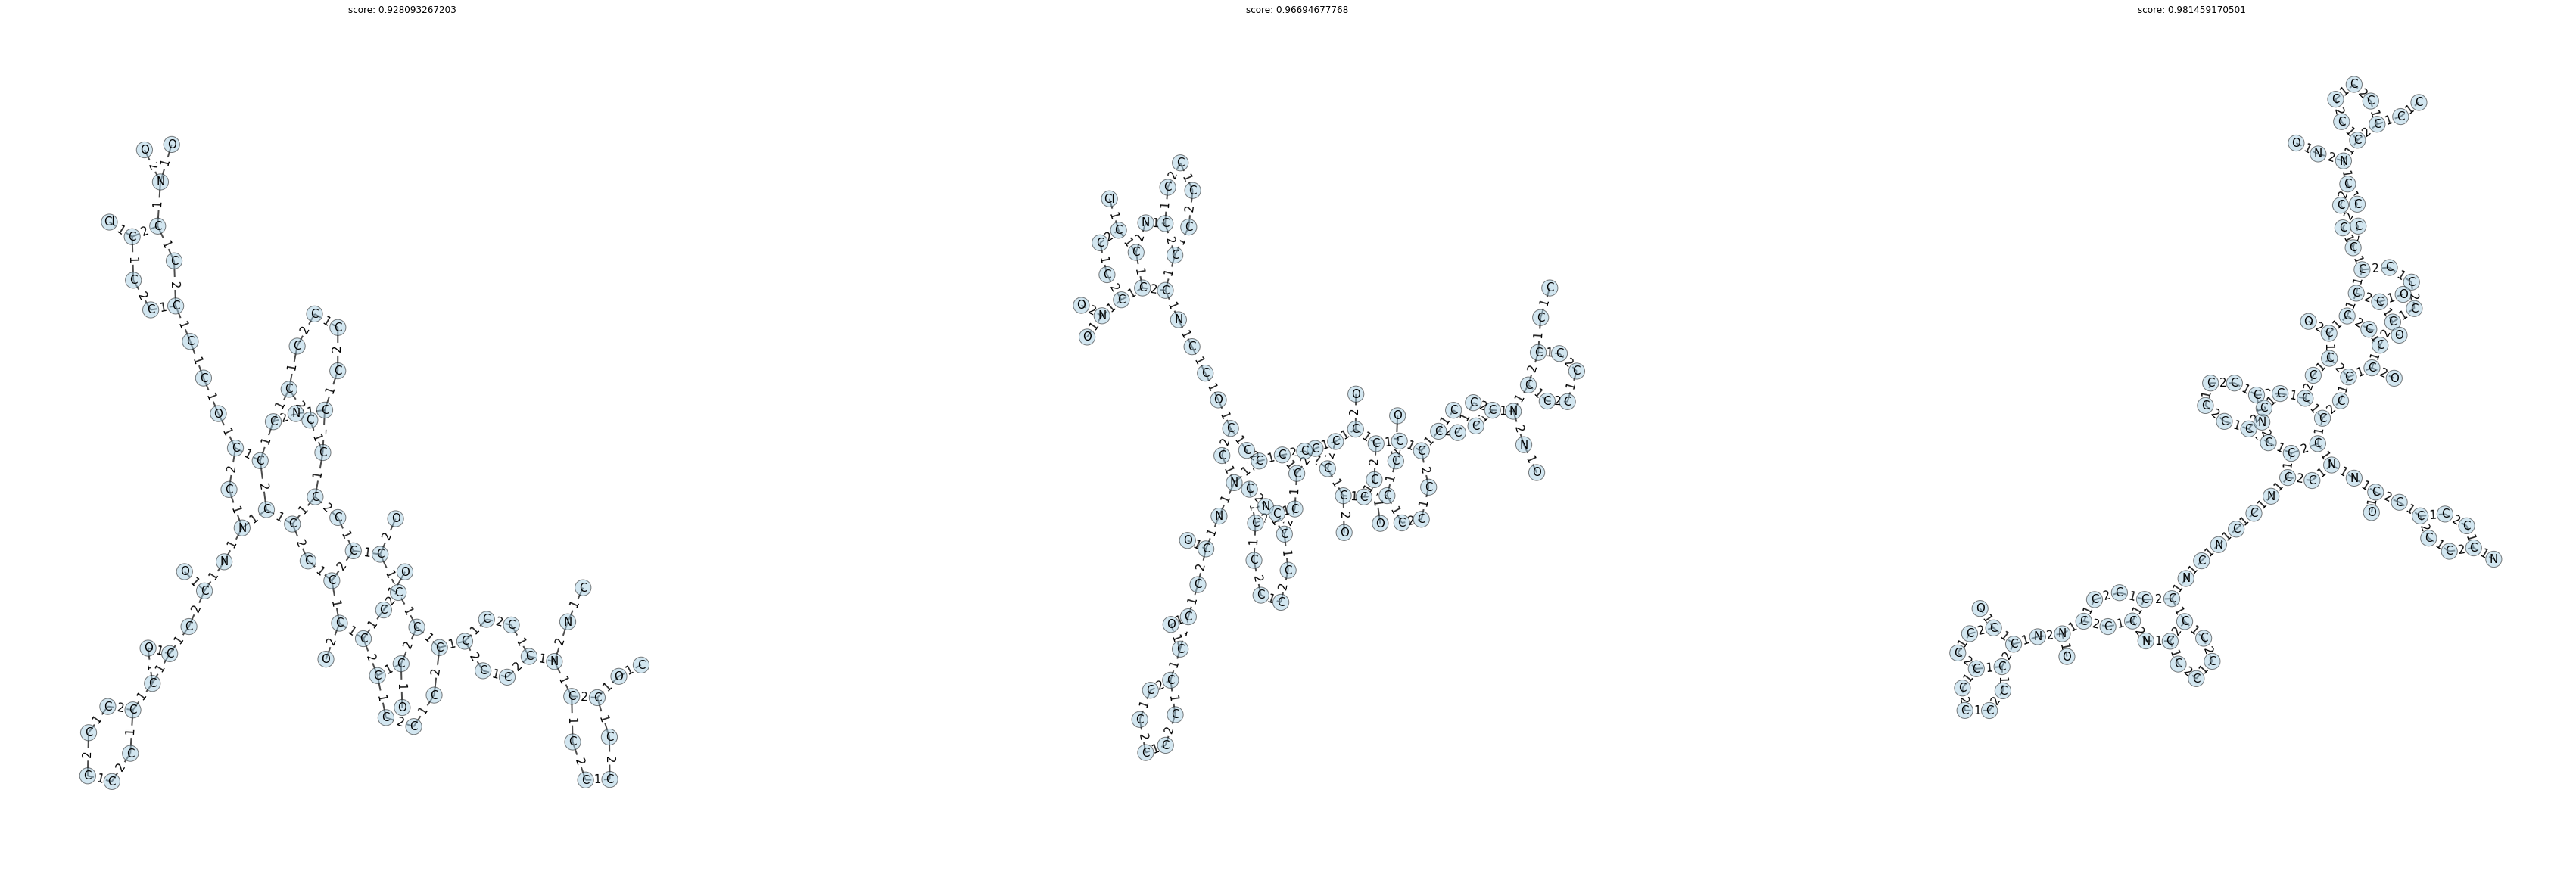

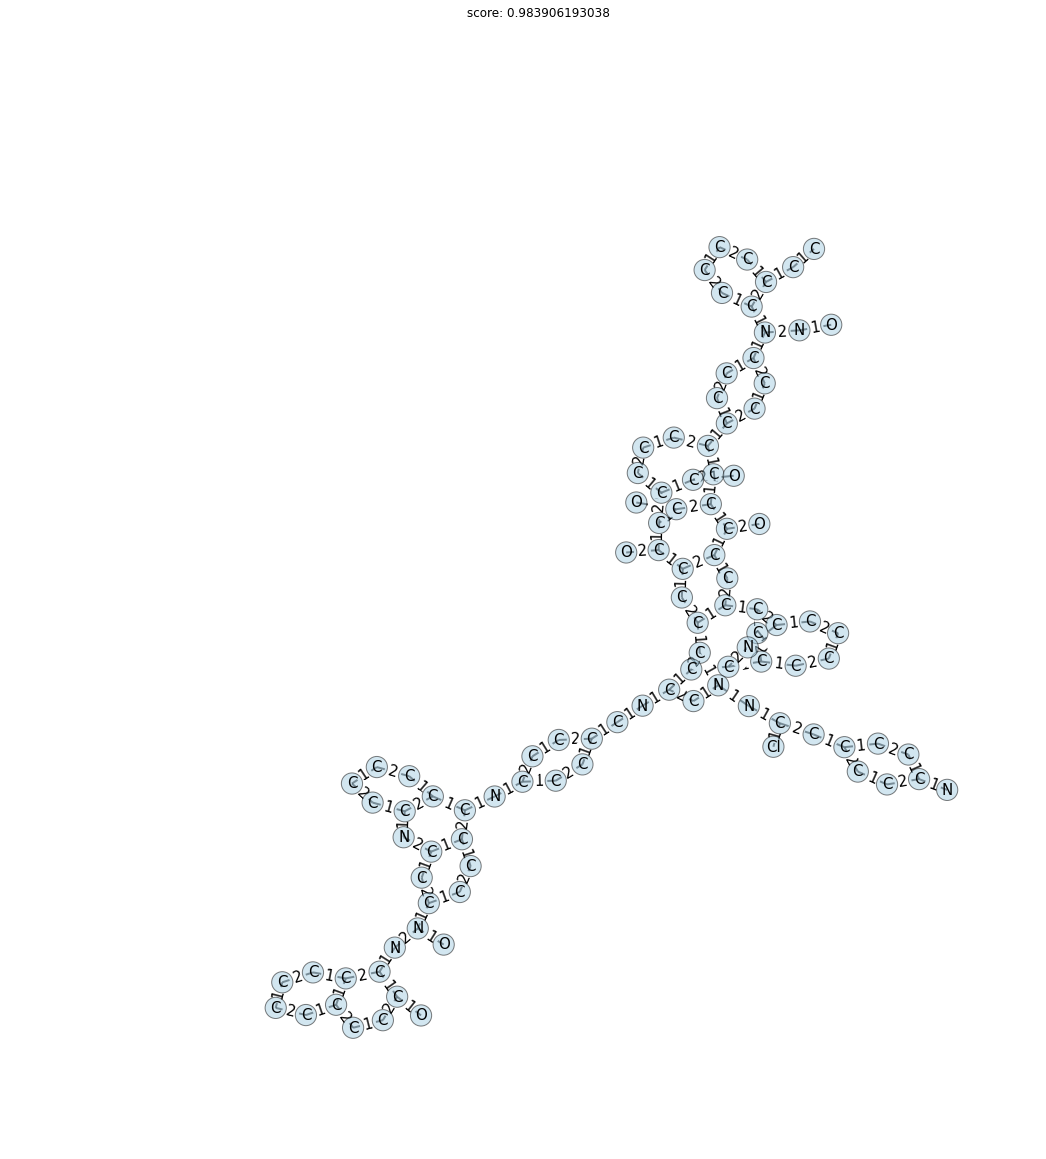

_propose_graph: iteration 0 ; core 0 of 11 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 18 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 27 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 5 ; original

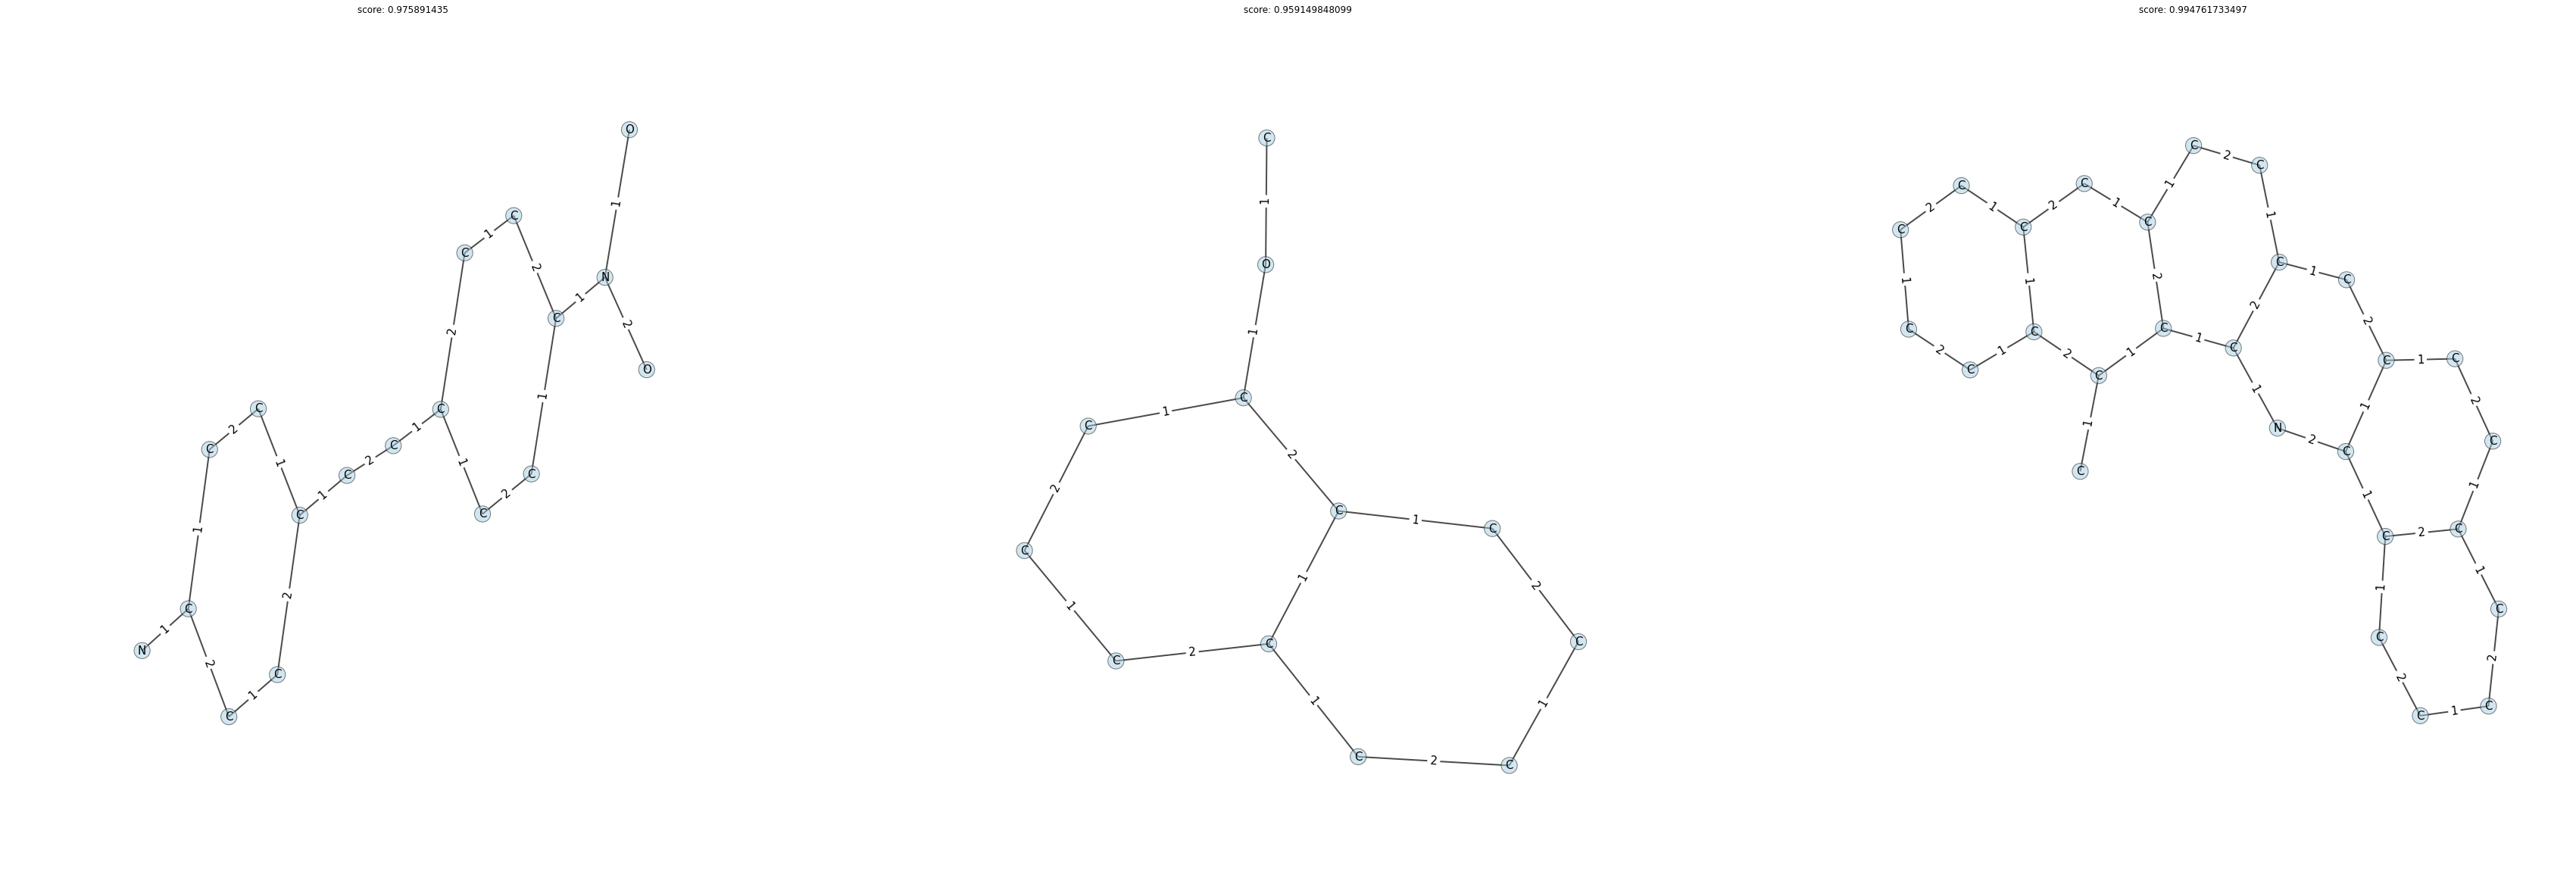

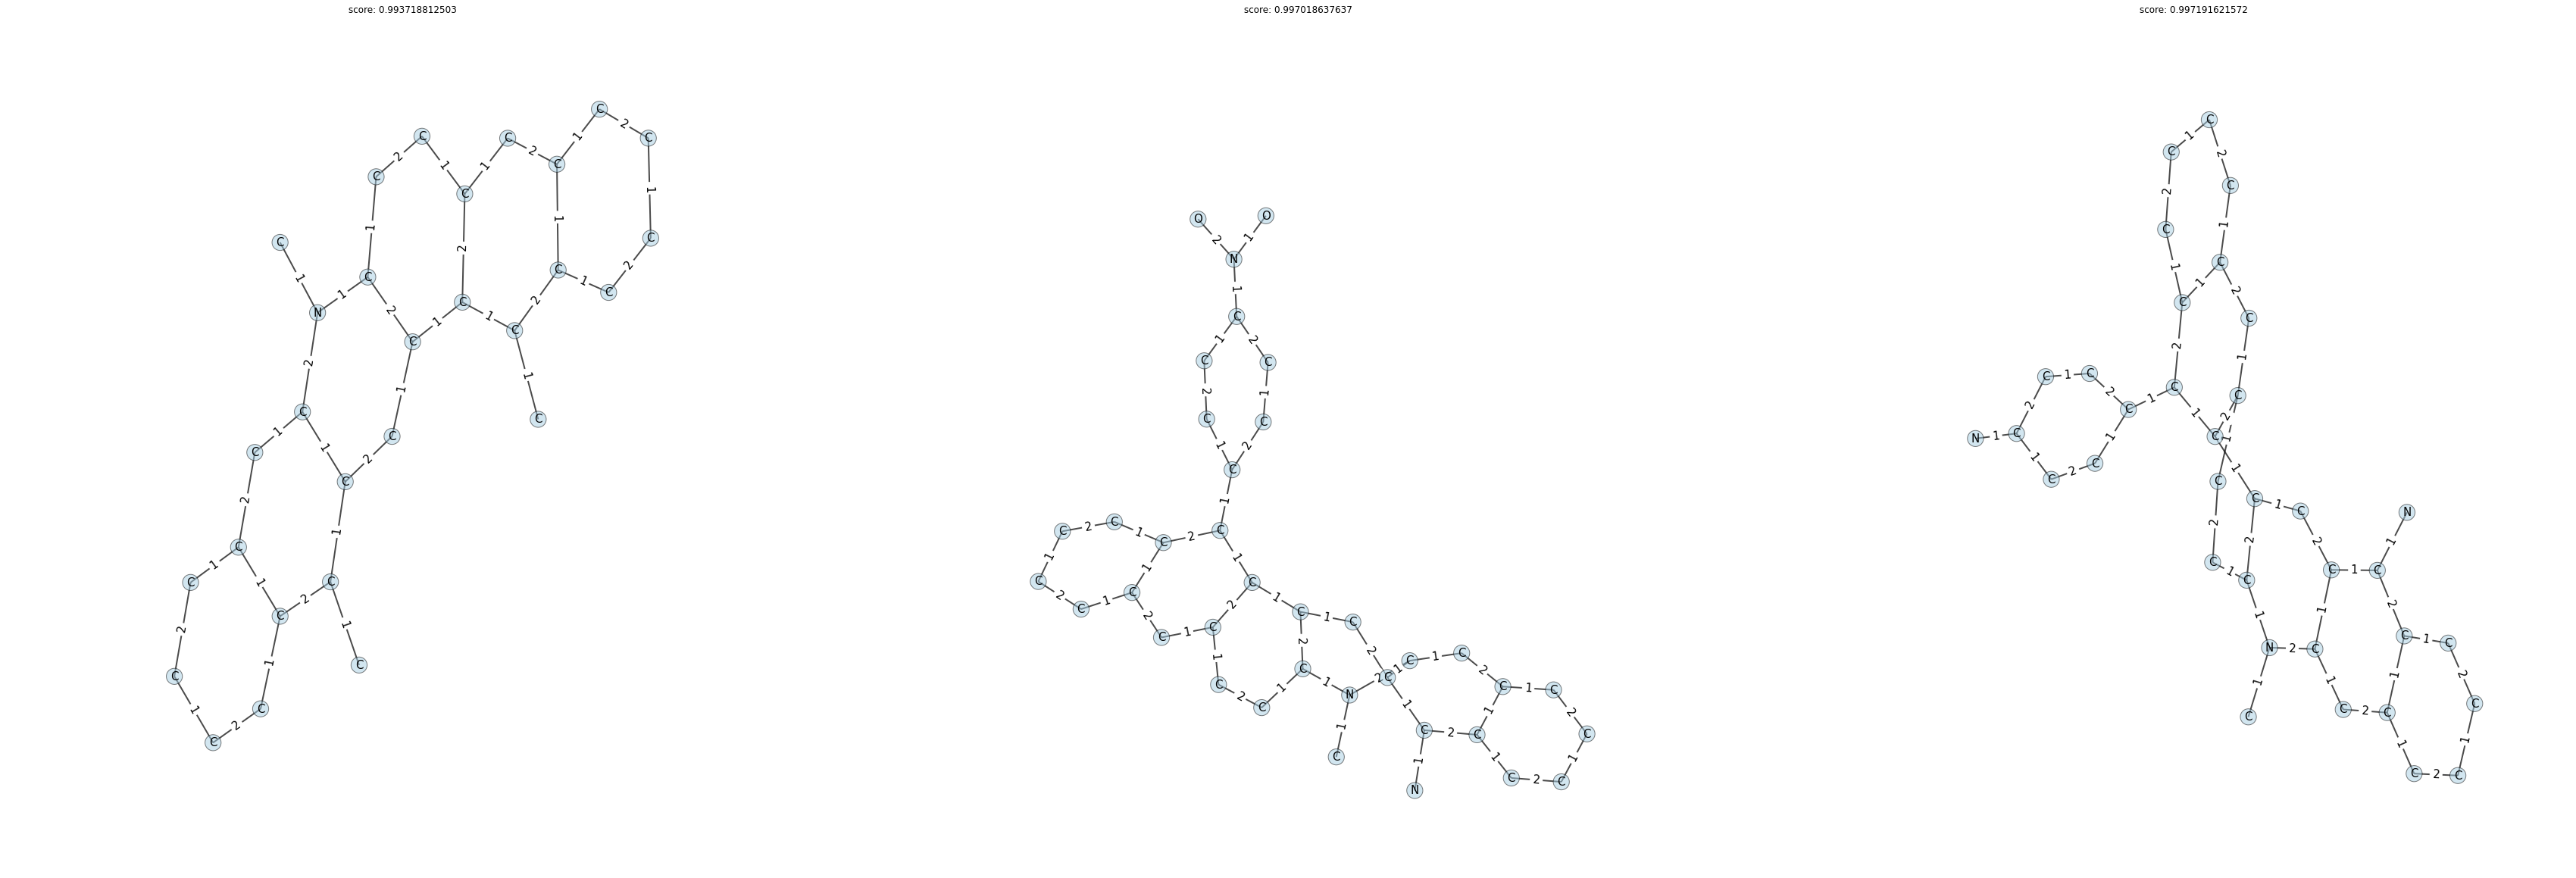

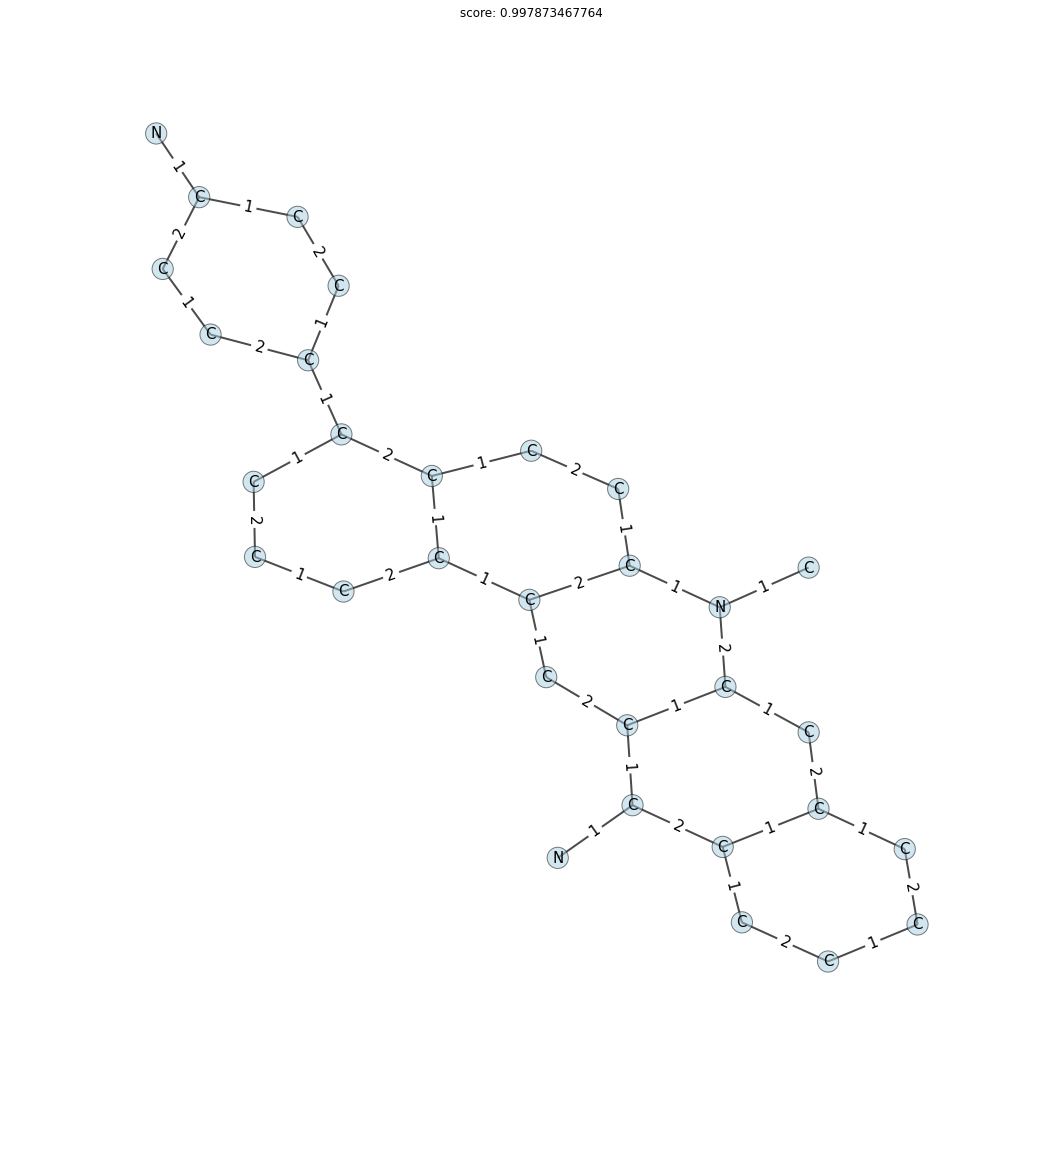

_propose_graph: iteration 0 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 17 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 17 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 19 ; origina

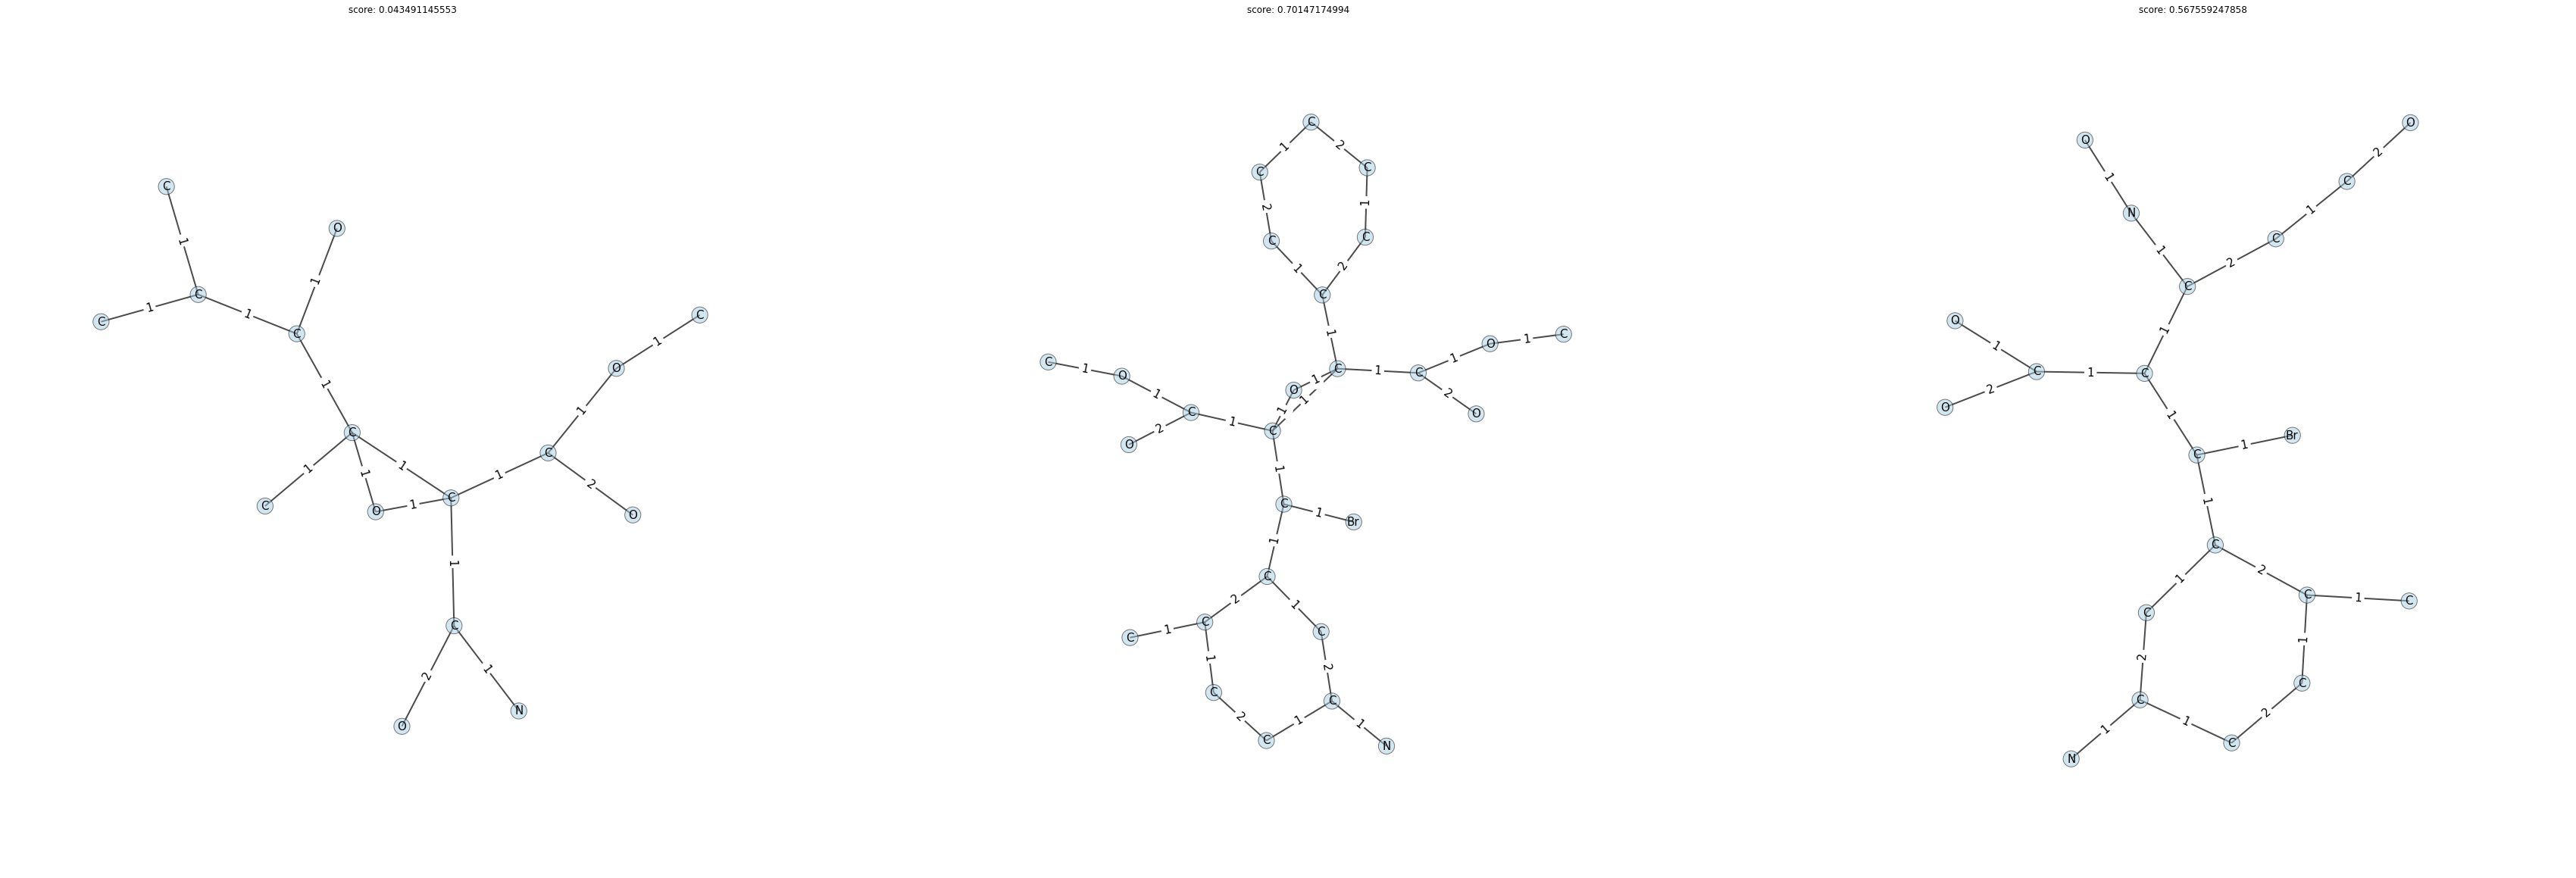

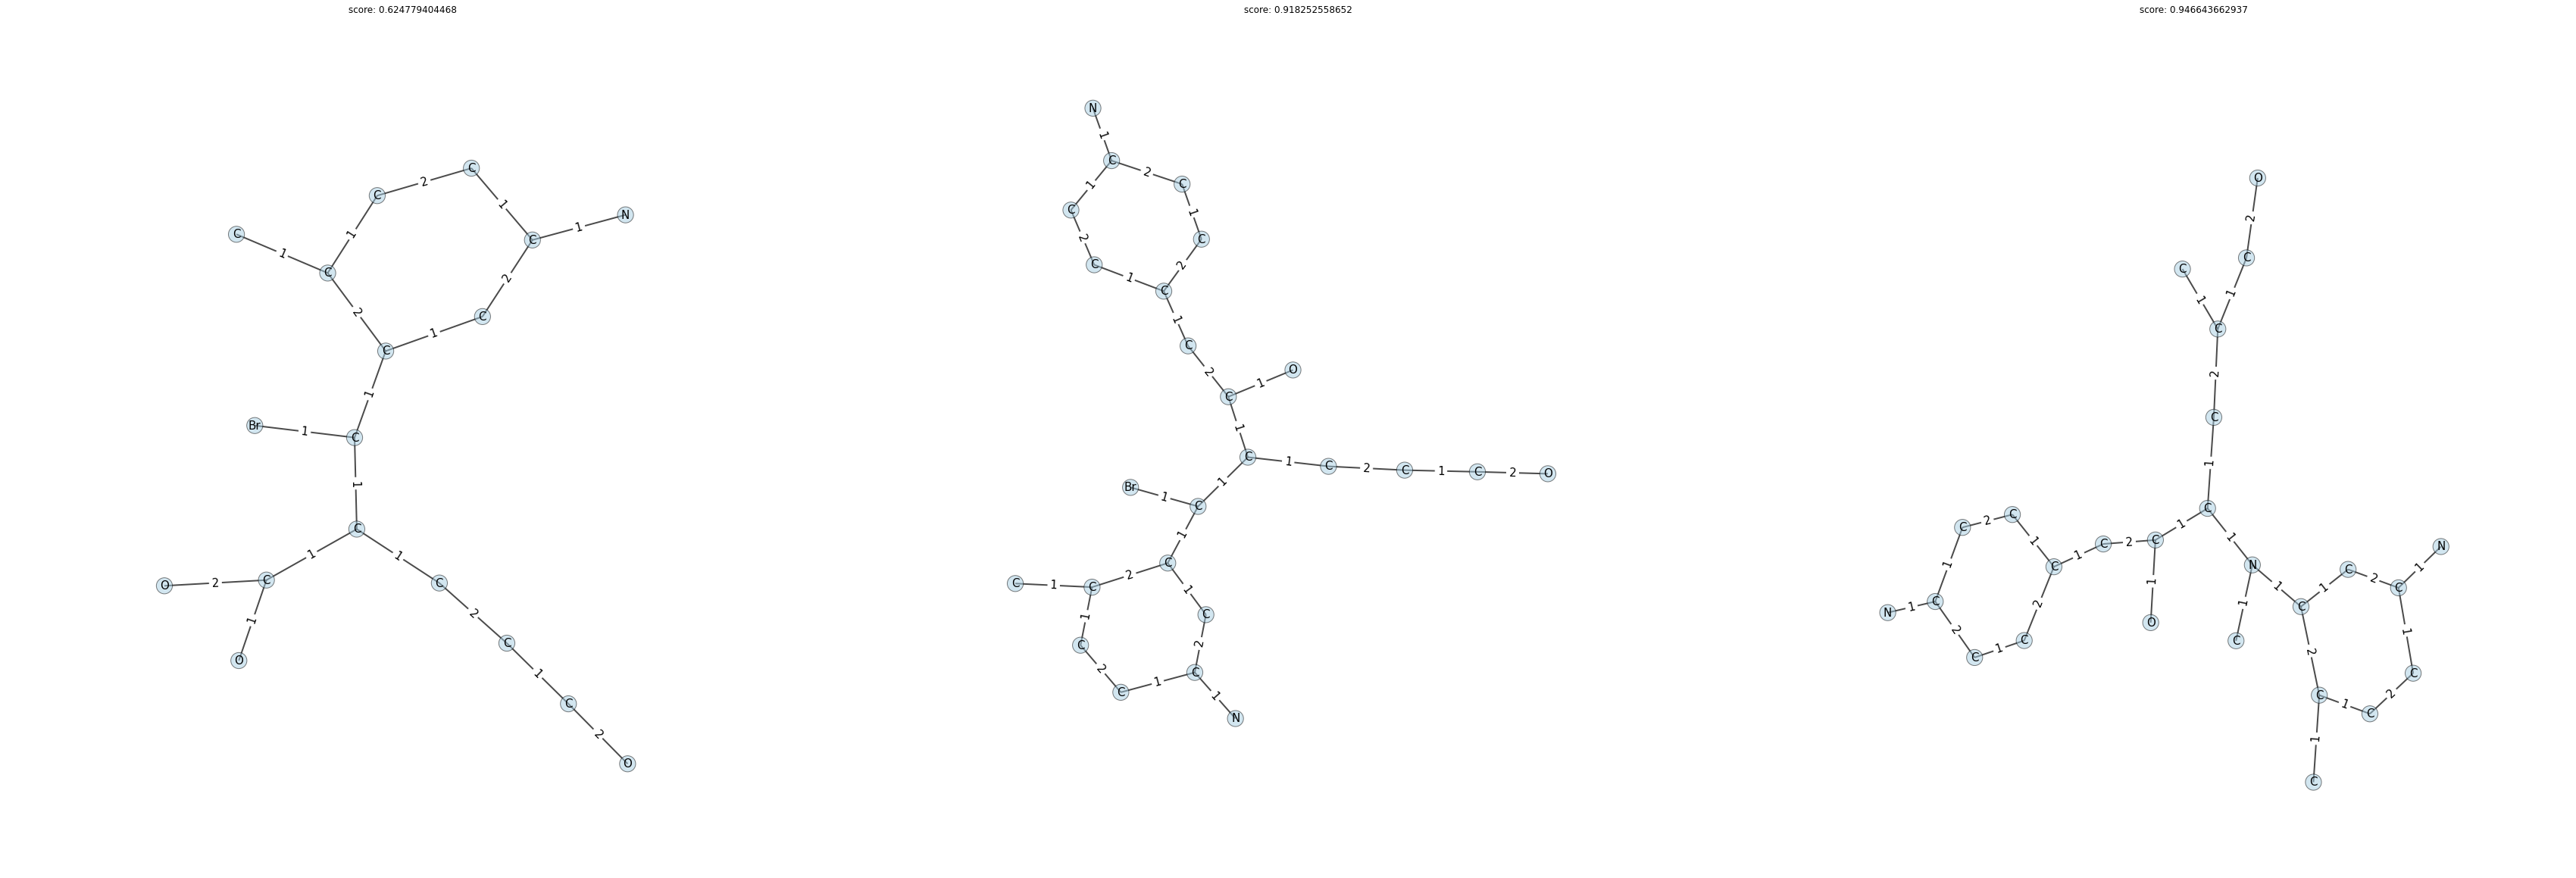

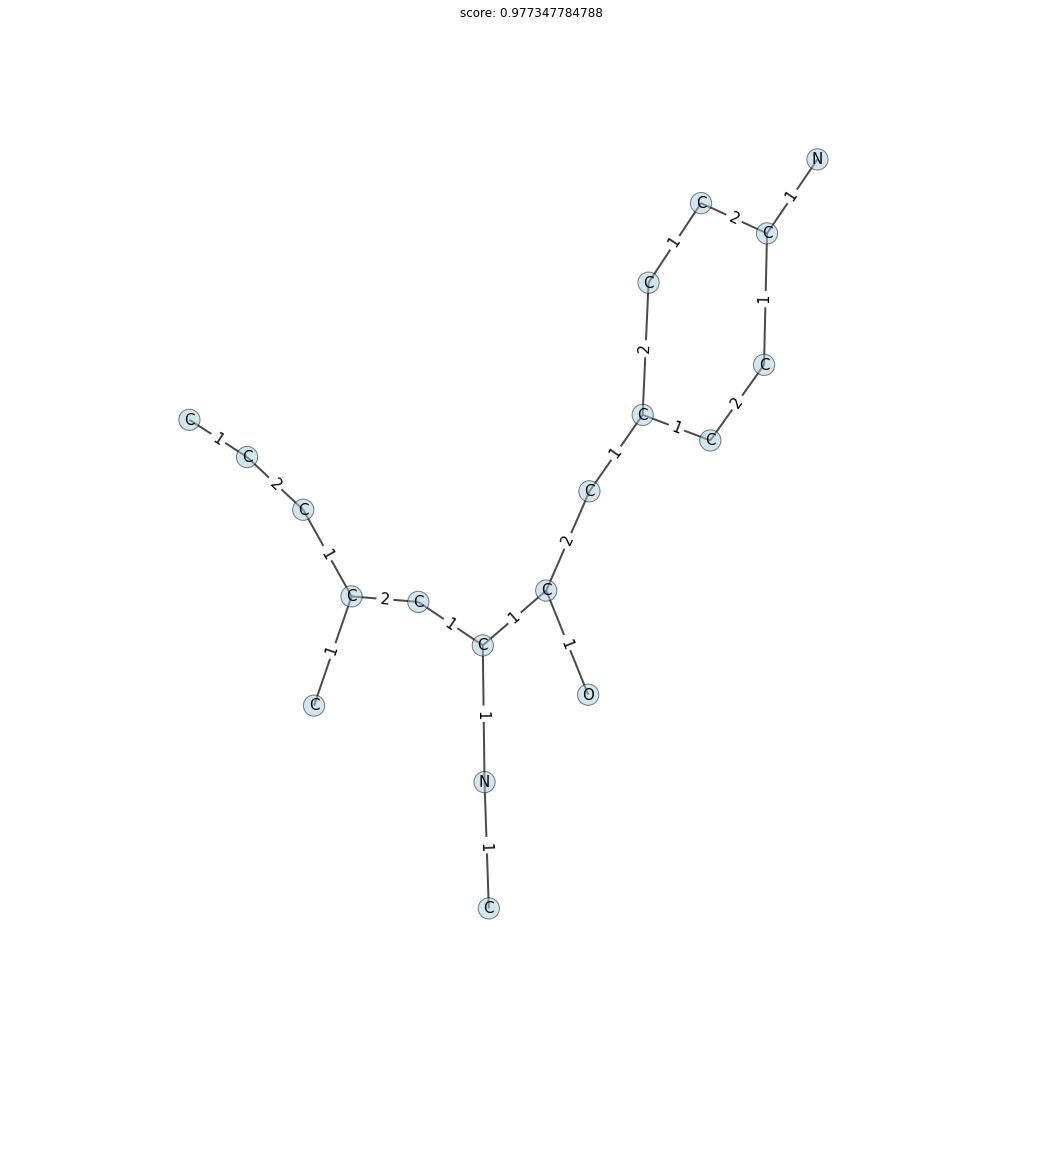

_propose_graph: iteration 0 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 29 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 19 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 6 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 35 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 35 ; orig

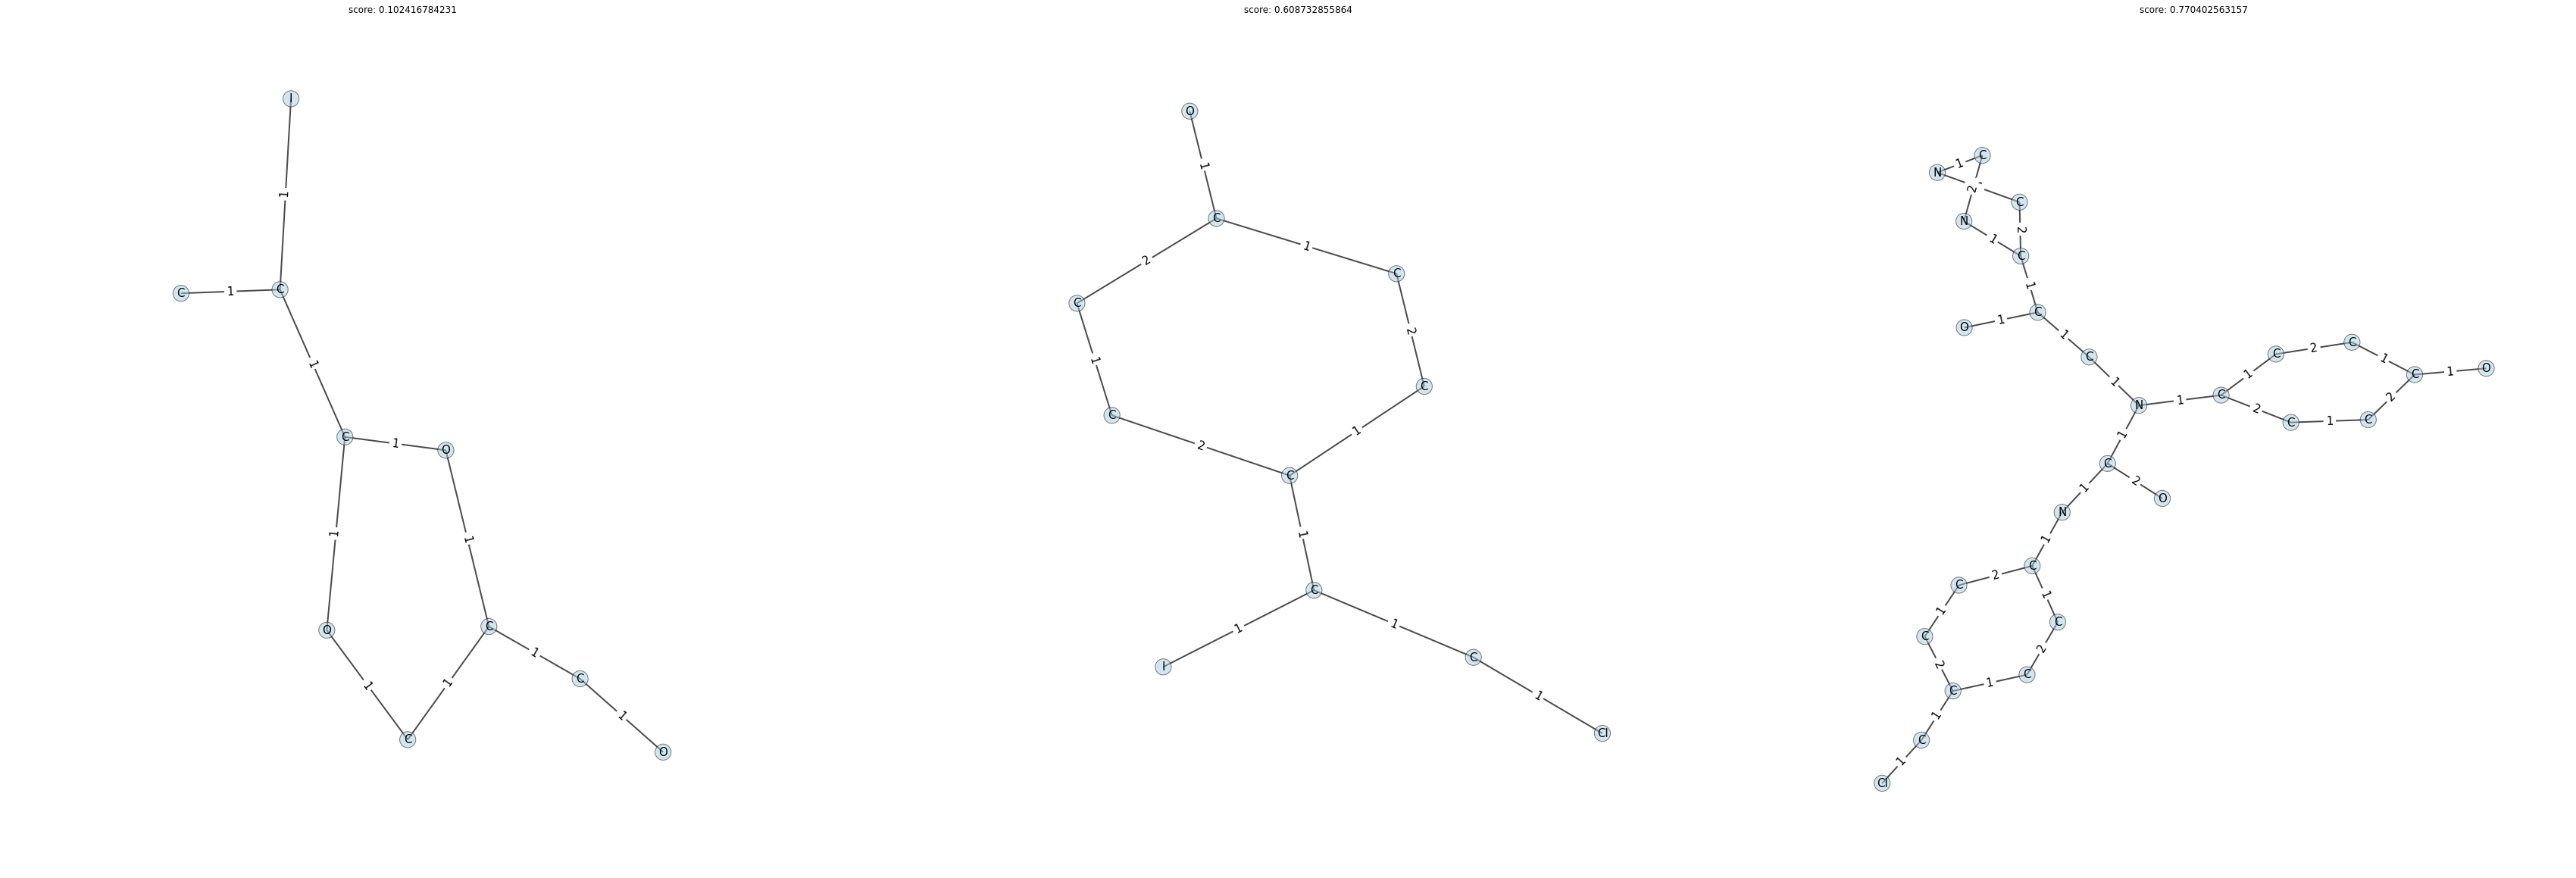

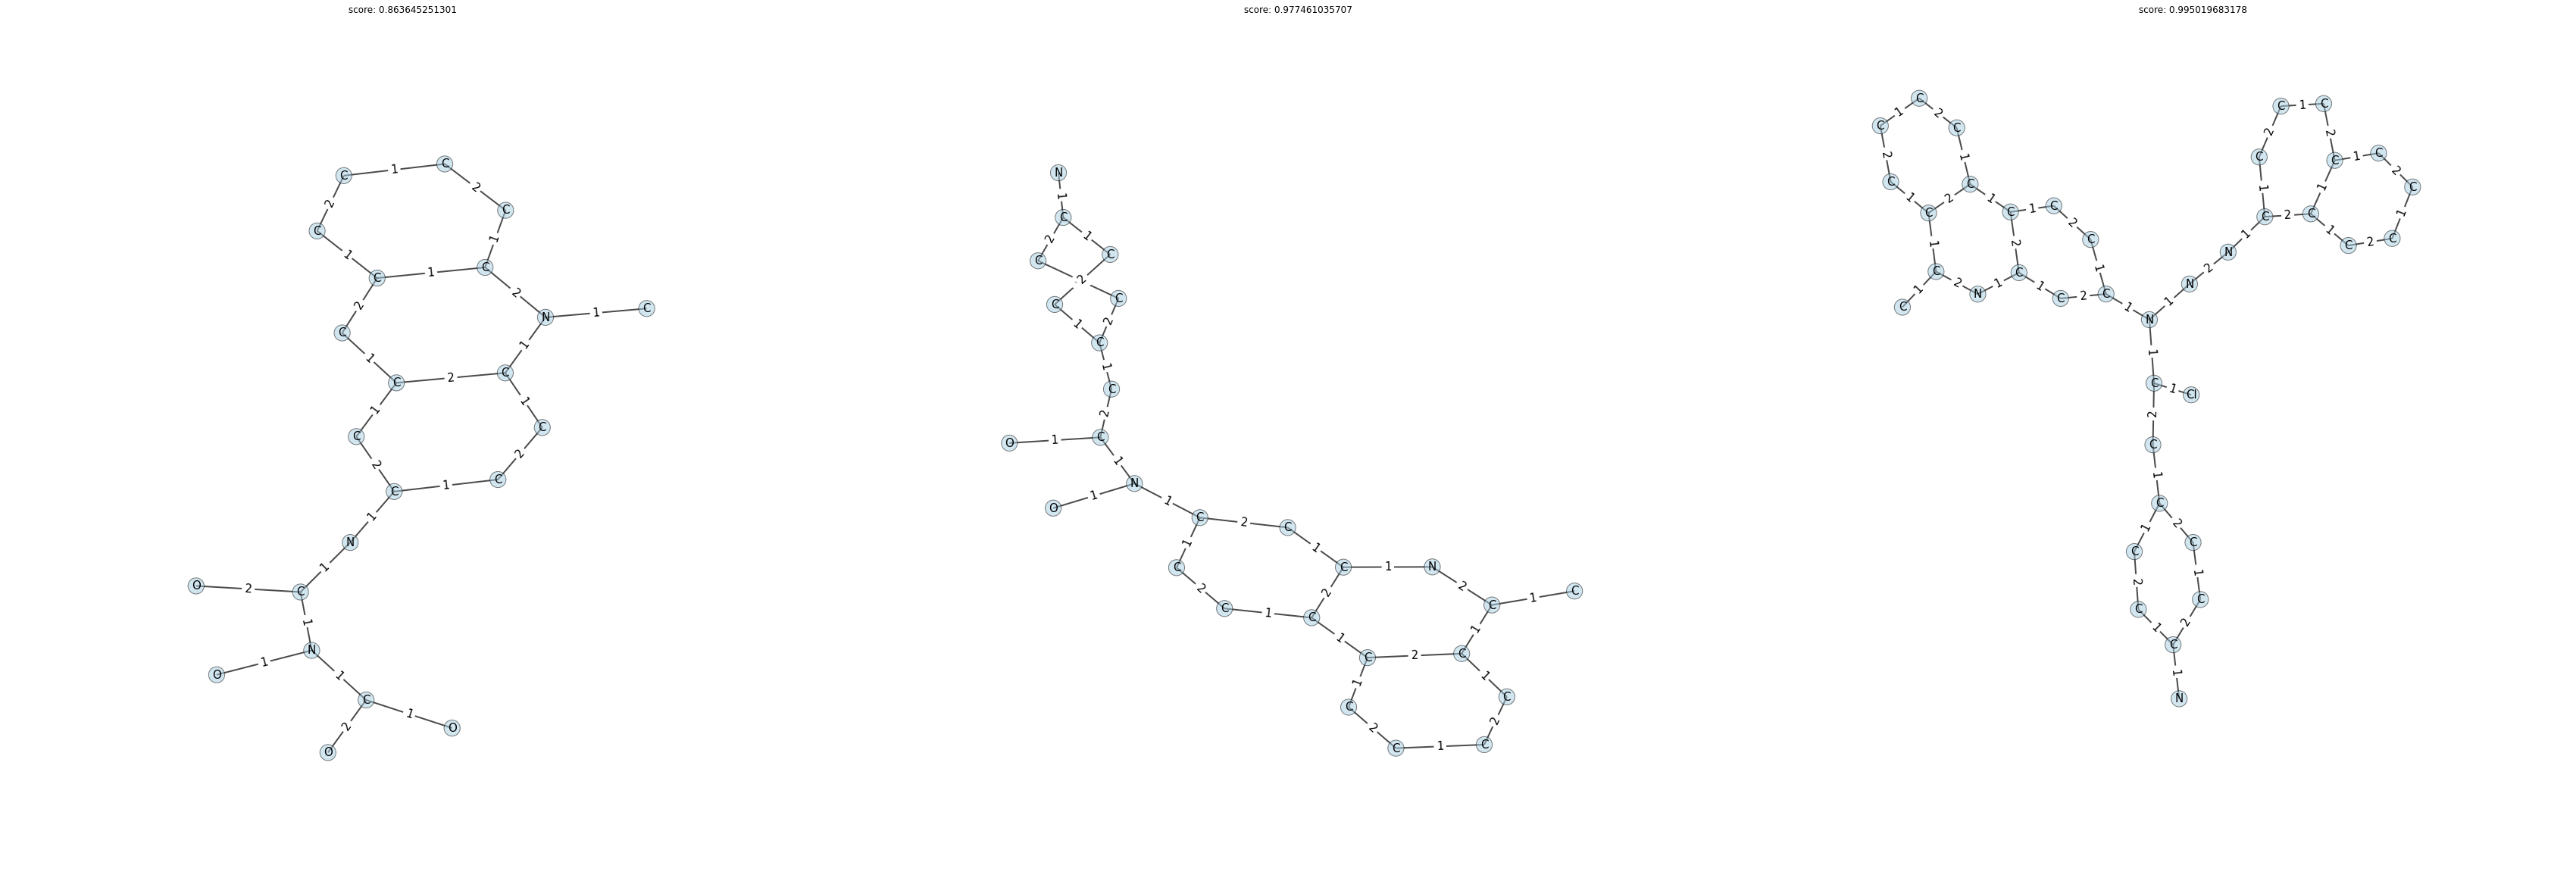

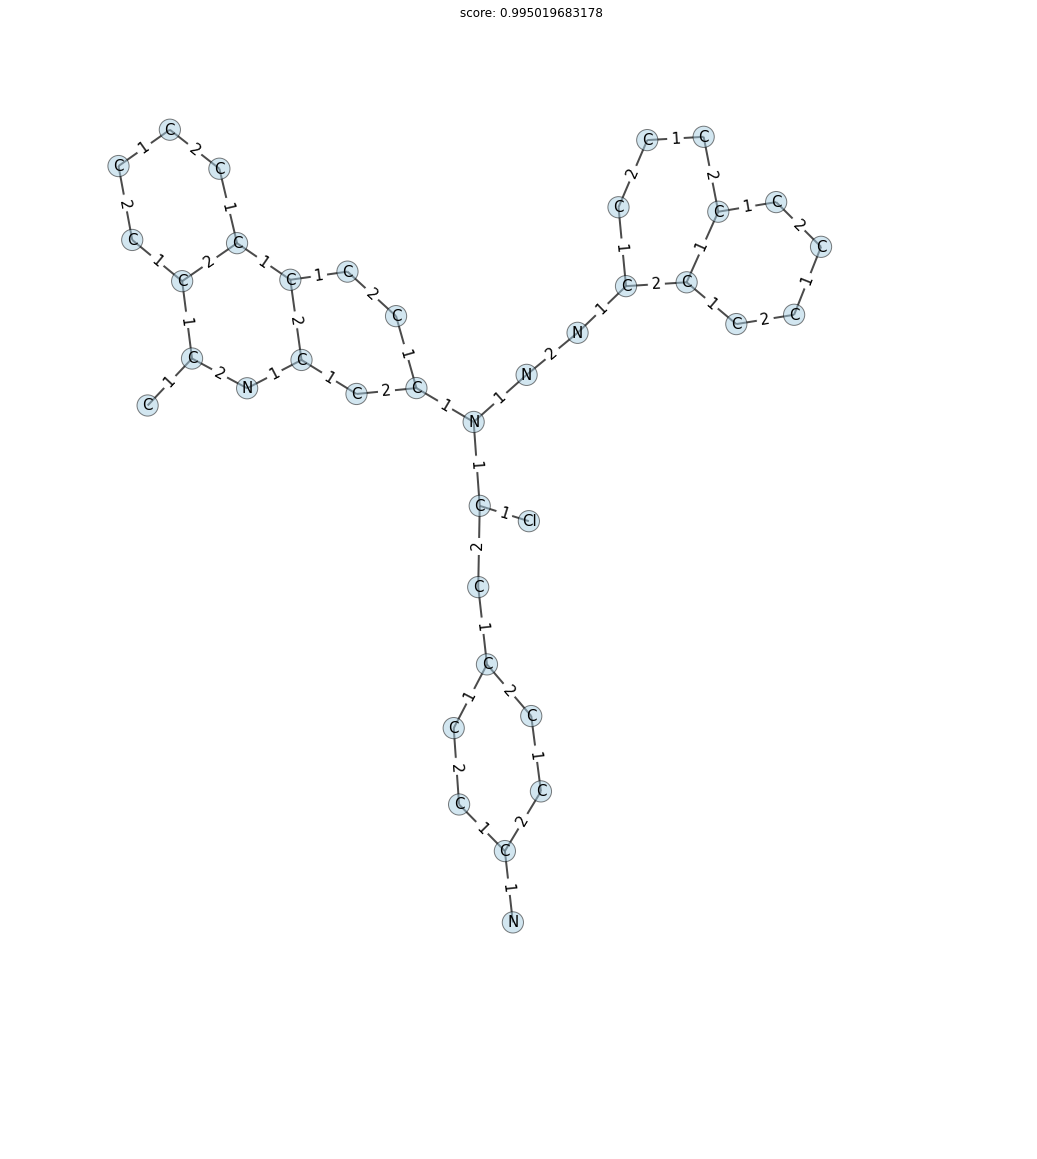

CPU times: user 2min 32s, sys: 2.32 s, total: 2min 35s
Wall time: 2min 38s


In [11]:
%%time
'''
RNA sampling
'''
import os
os.nice(19)
import graphlearn.utils.draw as draw
import graphlearn.abstract_graphs.molecules as mole
import itertools
sampler=mole.MoleculeSampler()
sampler.load('tmp/mole_ubergrammar.ge')
graphs = get_graphs()

id_start=15
id_end=id_start+9
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=100

graphs = sampler.sample(graphs,
                        n_samples=7,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        quick_skip_orig_cip=True,
                        probabilistic_core_choice=True,
                        burnin=0,
                        improving_threshold=0.5,
                        select_cip_max_tries=200,
                        keep_duplicates=True,
                        omit_seed=False)

 
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    

    path_graphs= list(path_graphs)
    draw.graphlearn_draw(path_graphs,
                           n_graphs_per_line=3, size=20, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label',
                          headlinehook= draw.get_score_of_graph
                          )
    

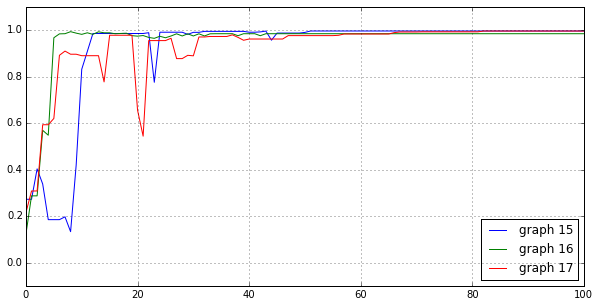

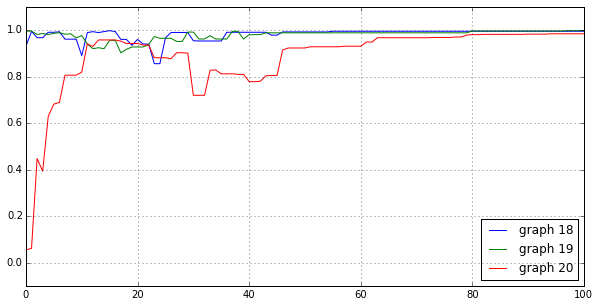

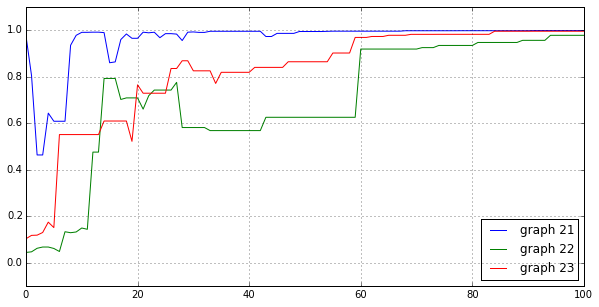

In [13]:
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

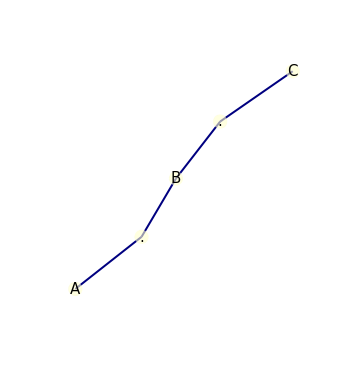

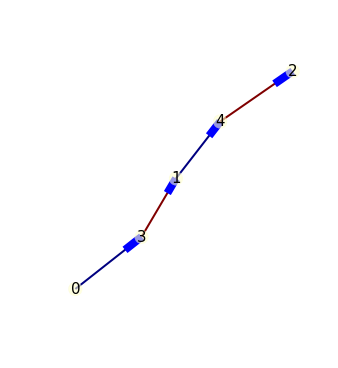

0 [3]
1 [4]
2 []
3 [1]
4 [2]
True


In [108]:

import networkx as nx
import graphlearn.utils.draw as draw
from eden.graph import Vectorizer

v=Vectorizer()
def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G

g=getpathgraph("ABC")

g= v._edge_to_vertex_transform(g)

draw.graphlearn_draw(g,contract=False,show_direction=True)

g2=nx.DiGraph(g)
#draw.display(g2,contract=False,vertex_label='id')

for n,d in g2.nodes(data=True):
    if 'edge' in d:
        if d['label']=='.':
            ns=g2.neighbors(n)
            g2.remove_edge(ns[1],n)
            g2.remove_edge(n,ns[0])
          
       
#g2 = g2.to_undirected()
draw.graphlearn_draw(g2,contract=False,vertex_label='id',show_direction=True)
g2.edges()
for n in g2.nodes():
    print n,g2.neighbors(n)
print isinstance(g2, nx.DiGraph) 

In [109]:
g2.edges(0,data=True)

[(0, 3, {'label': None})]

In [110]:
asd = g2.subgraph(range(2)).copy()

In [111]:
class A(object):
    def __init__(self,a=123):
        self.a=a
        
        
class B(A):
    def __init__(self,b=122):
        super(B,self).__init__(b)
        
        

class C(A):
    def __init__(self,c=121):
        super(C,self).__init__(c)
        
        
c=C()
c.a
        
        
        
    
    

121

[autoreload of graphlearn.abstract_graphs.ubergraphlearn failed: Traceback (most recent call last):
  File "/home/ikea/.local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "graphlearn/abstract_graphs/ubergraphlearn.py", line 68
    gr['graph'][]
                ^
SyntaxError: invalid syntax
]


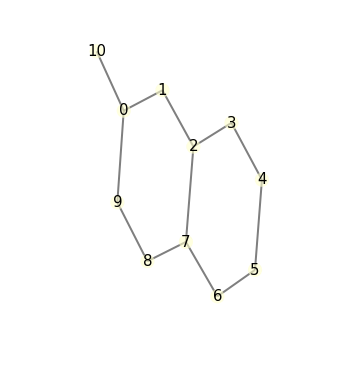

True

In [113]:
# testin cycle stuff
import networkx as nx
import graphlearn.utils.draw as draw
import graphlearn.feasibility as feas
from eden.graph import Vectorizer
v=Vectorizer()
%matplotlib inline


def find_all_cycles(G, source=None, cycle_length_limit=None):
    """forked from networkx dfs_edges function. Assumes nodes are integers, or at least
    types which work with min() and > ."""
    if source is None:
        # produce edges for all components
        nodes=[i[0] for i in nx.connected_components(G)]
    else:
        # produce edges for components with source
        nodes=[source]
    # extra variables for cycle detection:
    cycle_stack = []
    output_cycles = set()
    
    def get_hashable_cycle(cycle):
        """cycle as a tuple in a deterministic order."""
        m = min(cycle)
        mi = cycle.index(m)
        mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
        if cycle[mi-1] > cycle[mi_plus_1]:
            result = cycle[mi:] + cycle[:mi]
        else:
            result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
        return tuple(result)
    
    for start in nodes:
        if start in cycle_stack:
            continue
        cycle_stack.append(start)
        
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                
                if child not in cycle_stack:
                    cycle_stack.append(child)
                    stack.append((child,iter(G[child])))
                else:
                    i = cycle_stack.index(child)
                    if i < len(cycle_stack) - 2: 
                      output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
            except StopIteration:
                stack.pop()
                cycle_stack.pop()
    
    return [list(i) for i in output_cycles]


def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G

#g=getpathgraph("ABC")

#g= v._edge_to_vertex_transform(g)

#draw.graphlearn_draw(g,contract=False,show_direction=True)


#draw.display(g2,contract=False,vertex_label='id')

g=nx.cycle_graph(10)
g.add_edge(2,7)
g.add_edge(10,0)

draw.graphlearn_draw(g, vertex_label='id')


feas.rooted_problem_cycle(g,2,4)

In [114]:
print g.graph

{'name': 'cycle_graph(10)'}
